In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import os #システム操作系
import csv
import pickle
from pathlib import Path #ファイル操作系
import json
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


data_size = 100 #配列の大きさ
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
NOISE = 0

現在時刻： 2021-02-13 17:18:23.728867


In [8]:
# グラフの初期設定
plt.rcParams["figure.figsize"] = [3.14, 3.14] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["figure.dpi"] = 200 # dpi(dots per inch)
plt.rcParams["figure.facecolor"] = 'white' # 図の背景色
plt.rcParams["figure.edgecolor"] = 'black' # 枠線の色
plt.rcParams["font.family"] = "serif"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14              # 基本となるフォントの大きさ

plt.rcParams["xtick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["ytick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 5.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 0.5     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 0.5     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.visible"] = False # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = False # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 2.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 2.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.3     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.3     # y軸副目盛り線の線幅
plt.rcParams["xtick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["ytick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["xtick.major.pad"] = 3.0      # x軸から目盛までの距離
plt.rcParams["ytick.major.pad"] = 4.0      # y軸から目盛までの距離

plt.rcParams["axes.labelsize"] = 10         # 軸ラベルのフォントサイズ
plt.rcParams["axes.linewidth"] = 1.0        # グラフ囲う線の太さ
plt.rcParams["axes.grid"] = False           # グリッドを表示するかどうか

In [14]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, '210218')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/210218


In [15]:
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

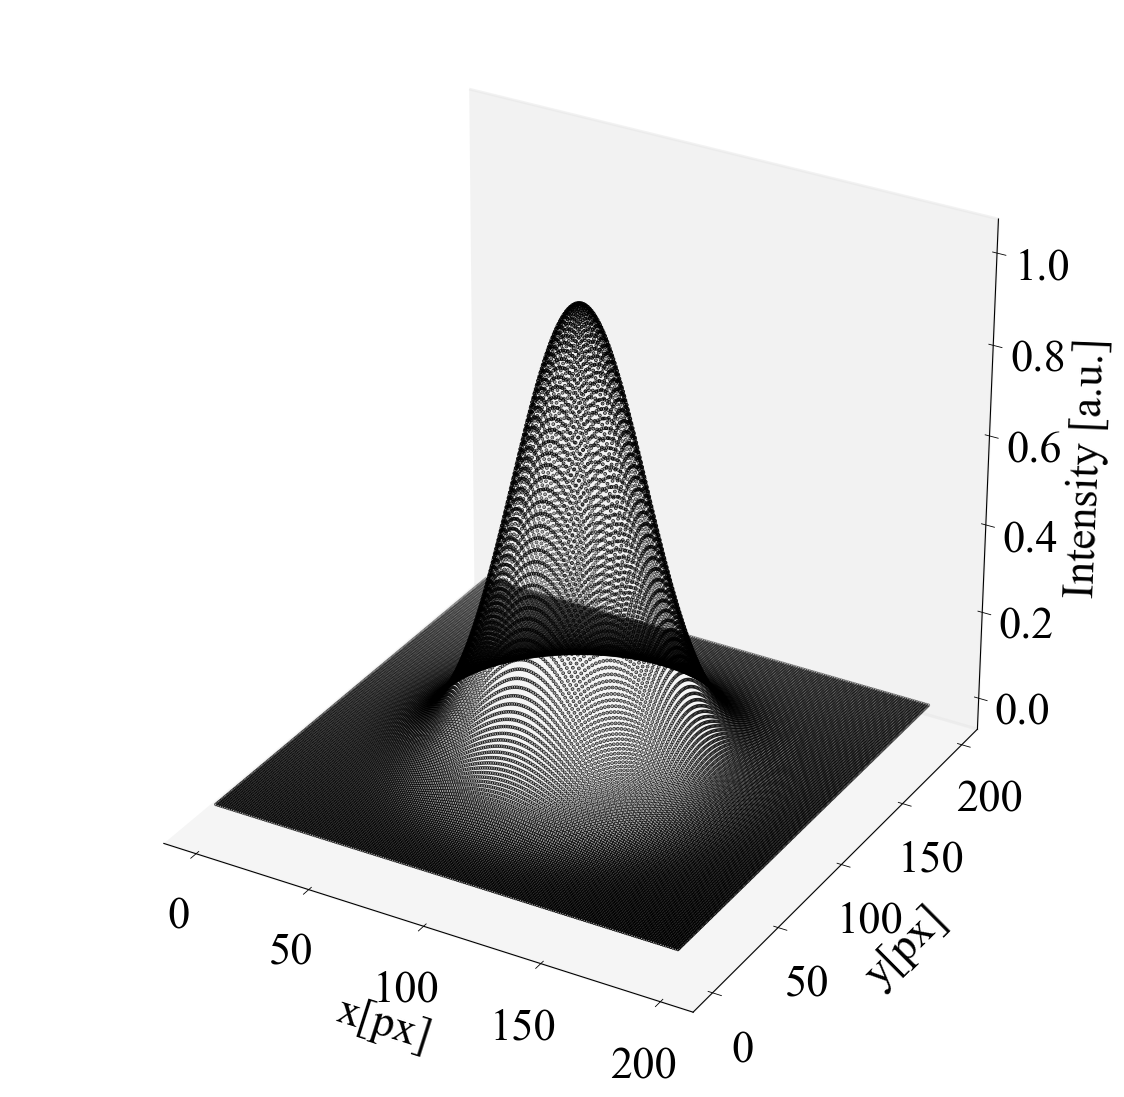

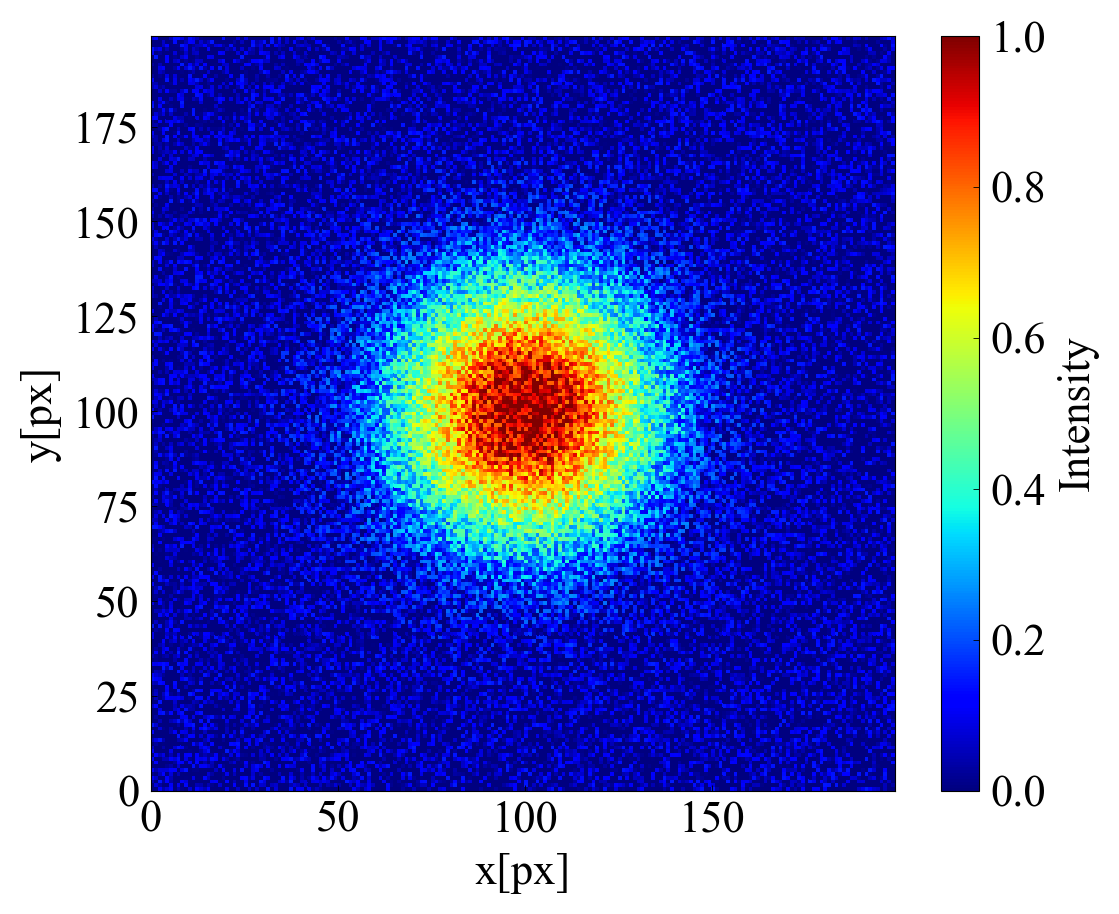

保存ファイル名： 2021-01-12_13-39_cmap.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210108/learning_1d/210112/2021-01-12_13-39_cmap.png


In [16]:
#画像サイズ
idx = np.zeros(2)
size = 100
x_array = np.arange(0, size*2, 1.0)                         # x配列
y_array = np.arange(0, size*2, 1.0)                         # y配列
nx = len(x_array)
ny = len(y_array)
x_grid, y_grid = np.meshgrid(x_array, y_array)
intensity = np.zeros((nx,ny))
idx = idx + size #中心に持ってくる
start = time.time()
#初期パラメータ
i0 = 1.0
b0 = 0
x0 = 100
y0 = 100
wx = 50
wy = 50
h0 = 0
param = np.array([i0, b0, x0, y0, wx, wy, h0])  #初期値
    
#強度の計算
intensity = gaussian_beam_xy((x_grid.T, y_grid.T), *param).reshape(nx,ny)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity [a.u.]", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, intensity, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()

intensity_noise = np.zeros(nx*ny)
noise = (np.random.rand(nx*ny)-0.5)*i0*30*0.01   #プラスマイナスNOISE%のノイズ(一様分布), (np.random.rand(nx*ny)-0.5)*2の部分が-1から1までの乱数になる
intensity_noise = intensity.flatten() + noise
intensity_noise = intensity_noise.reshape(nx,ny)

save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_cmap.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, intensity_noise, cmap='jet', vmin=0.0, vmax=1.0)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Intensity", fontsize=16)
cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file)
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

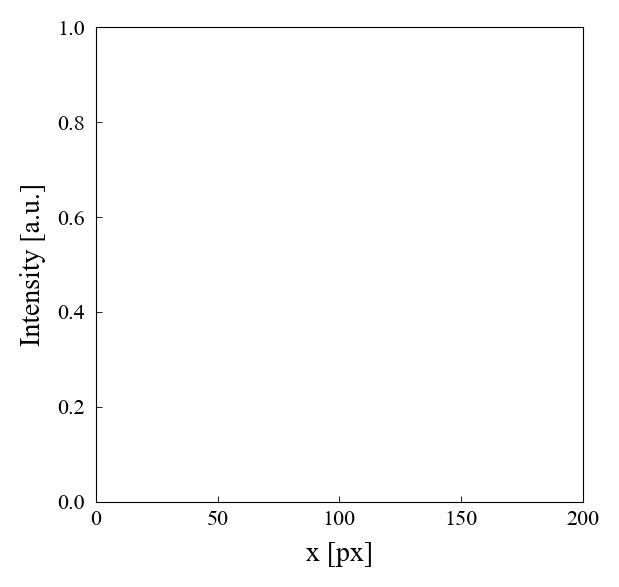

In [17]:
parameters = np.zeros(4)
parameters[0] = param[0]
parameters[1] = 99
parameters[2] = param[2]
parameters[3] = param[3]
fit = gaussian_beam(x_array, *parameters)

#表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_fitg_x=99.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
x_array = np.arange(0, 200, 1.0)   
#plt.scatter(x_array, profile_x,  color="black", label = 'x0 = 0.0', s=1.0)
plt.plot(x_array, fit, color="black")
plt.xlabel('x [px]')          # 軸ラベル
plt.ylabel('Intensity [a.u.]')
plt.xlim(0.0, 200.0)      # x軸の表示範囲
plt.ylim(0.0, 1.0)      # x軸の表示範囲
plt.savefig(save_file)
plt.show()
plt.close()

現在時刻： 2021-01-10 11:56:40.913805


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2021-01-08_16-57_CNN(出力1)_loss.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2021-01-08_16-57_CNN(出力1)_mae.pdf


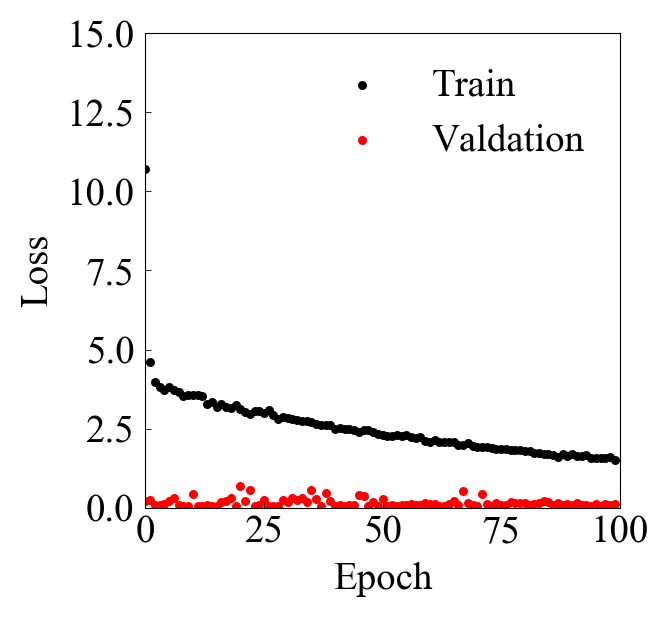

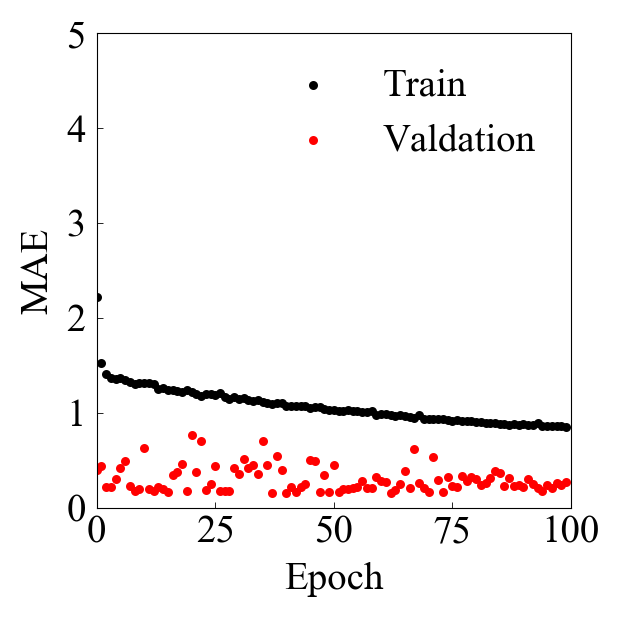

In [8]:
#過去の訓練データ読込
model_num = list(np.zeros(2))
model_num[0] = "2021-01-08_16-59_NN(出力1)"
model_num[1] = "2021-01-08_16-57_CNN(出力1)"
cnn = 1
data_py_path = model_num[cnn] + "uni_history.json"
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
df = pd.read_json(data_py_path)
df = df.sort_index()
df['epoch'] = np.arange(0, 100)

#損失関数の推移
save_name = model_num[cnn] +'_loss.pdf'
#save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成

fig = plt.figure()
ax = fig.add_subplot(111)
df.plot.scatter(x = 'epoch',y = 'loss',  color="black", label = 'Train',s=5, ax = ax)
df.plot.scatter(x = 'epoch',y = 'val_loss',  color="red", label = 'Valdation',s=5, ax = ax)
plt.legend(frameon=False)
ax.set_xlabel('Epoch',fontsize=14)          # 軸ラベル
ax.set_ylabel('Loss',fontsize=14)
ax.set_xlim(0, 100)      # y軸の表示範囲
ax.set_ylim(0, 15)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_name, format="pdf", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
#print('保存ファイルパス：', save_file)

#maeの推移
save_name = model_num[cnn] +'_mae.pdf'
#save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot.scatter(x = 'epoch',y = 'mae',  color="black", label = 'Train',s=5, ax = ax)
df.plot.scatter(x = 'epoch',y = 'val_mae',  color="red", label = 'Valdation',s=5, ax = ax)
plt.legend(frameon=False)
ax.set_xlabel('Epoch',fontsize=14)          # 軸ラベル
ax.set_ylabel('MAE',fontsize=14)
ax.set_xlim(0, 100)      # y軸の表示範囲
ax.set_ylim(0, 5)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_name, format="pdf", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
#print('保存ファイルパス：', save_file)

In [4]:
#フィッティングパラメータ取得
data_param_path = '2021-01-07_14-08_fit-param.pkl'
with open(data_param_path, mode="rb") as f:
    param = pickle.load(f)
print(param)

[9.84754616e-01 9.97140288e+01 4.55644713e+01 9.99275241e-03]


In [5]:
train_num = 21 #訓練データの数
data_size = 200 #配列の大きさ

train_x = np.zeros((train_num,data_size,data_size))
train_t = np.zeros((len(param),train_num))

train_x2 = np.zeros((train_num,data_size,data_size))

In [6]:
#訓練データ作成
N = train_num #訓練データの個数
#1Dガウシアンビームの関数の定義
def gaussian_beam(x,i0,x0,w0,h0):
    return  i0 * np.exp(-2*(x-x0)**2/w0**2) + h0


#中心位置
idx = np.arange(0.0, 21, 1).repeat(N/21)
print(idx)
train_t[0] = param[0].repeat(N)
train_t[1] = idx
train_t[2] = param[2].repeat(N)
train_t[3] = param[3].repeat(N)
train_t = train_t.T
idx = idx-10.0
print(idx)
#画像サイズ
size = 100
x_array = np.arange(0, size*2, 1.0)                         # x配列
y_array = np.arange(0, size*2, 1.0)                         # y配列
nx = len(x_array)
intensity = np.zeros((N,nx))
idx = idx + size #中心に持ってくる
print(idx)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
[ 90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103.
 104. 105. 106. 107. 108. 109. 110.]


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss90.0.pdf
/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise90.0.pdf
/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss91.0.pdf
/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise91.0.pdf
/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss92.0.pdf
/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise92.0.pdf
/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss93.0.pdf
/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise93.0.pdf
/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss94.0.pdf
/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise94.0.pdf
/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss95.0.pdf
/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise95.0.pdf
/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gau

/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss100.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise100.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss101.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise101.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss102.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise102.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss103.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise103.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss104.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise104.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss105.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise105.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss106.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise106.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss107.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise107.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss108.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise108.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss109.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise109.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss110.0.pdf


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/nagaiyuma/Documents/myprogram/210218/2021-02-13_17-18_gauss+noise110.0.pdf


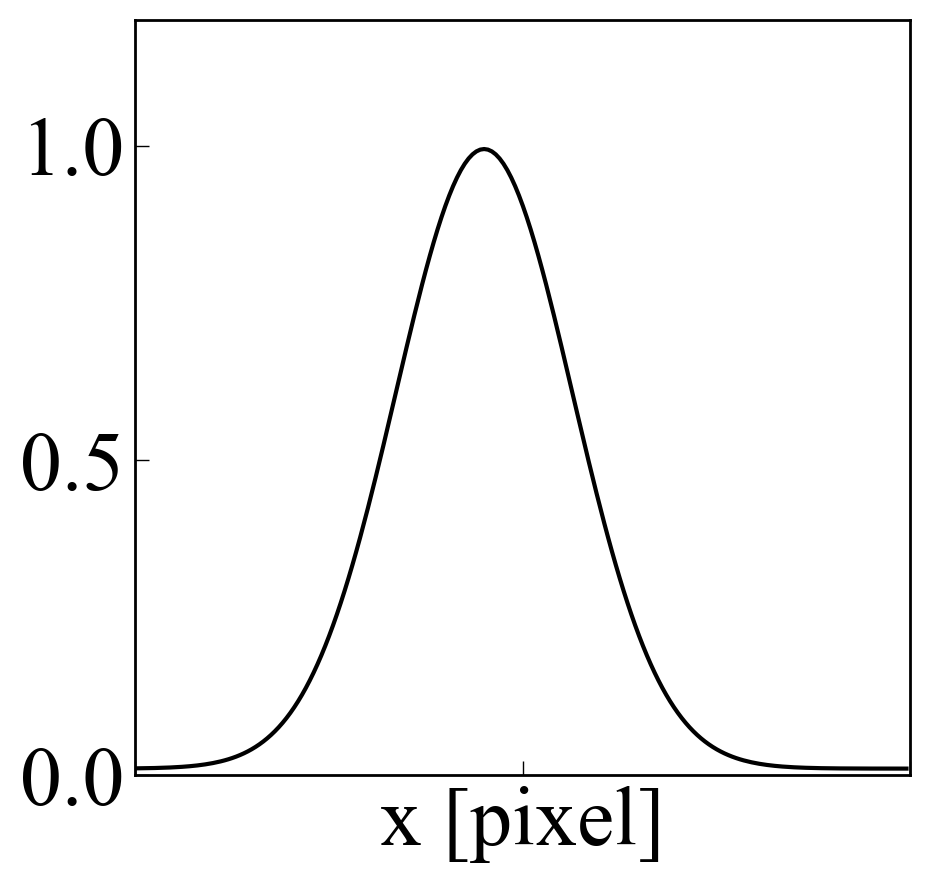

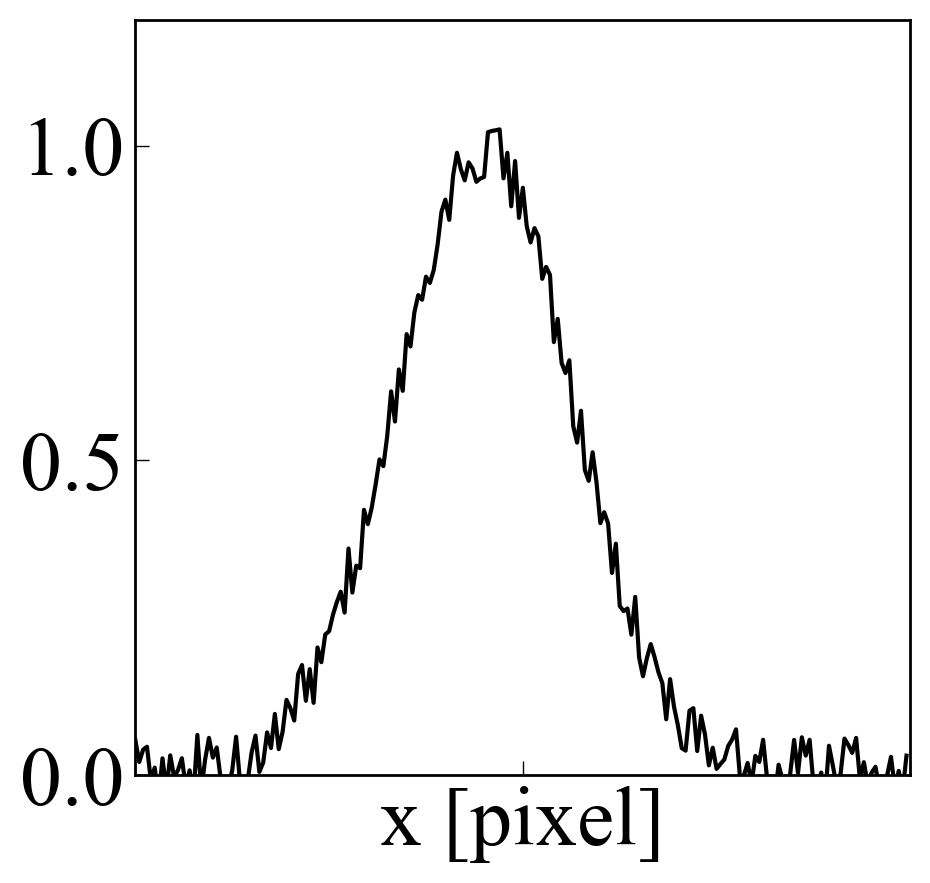

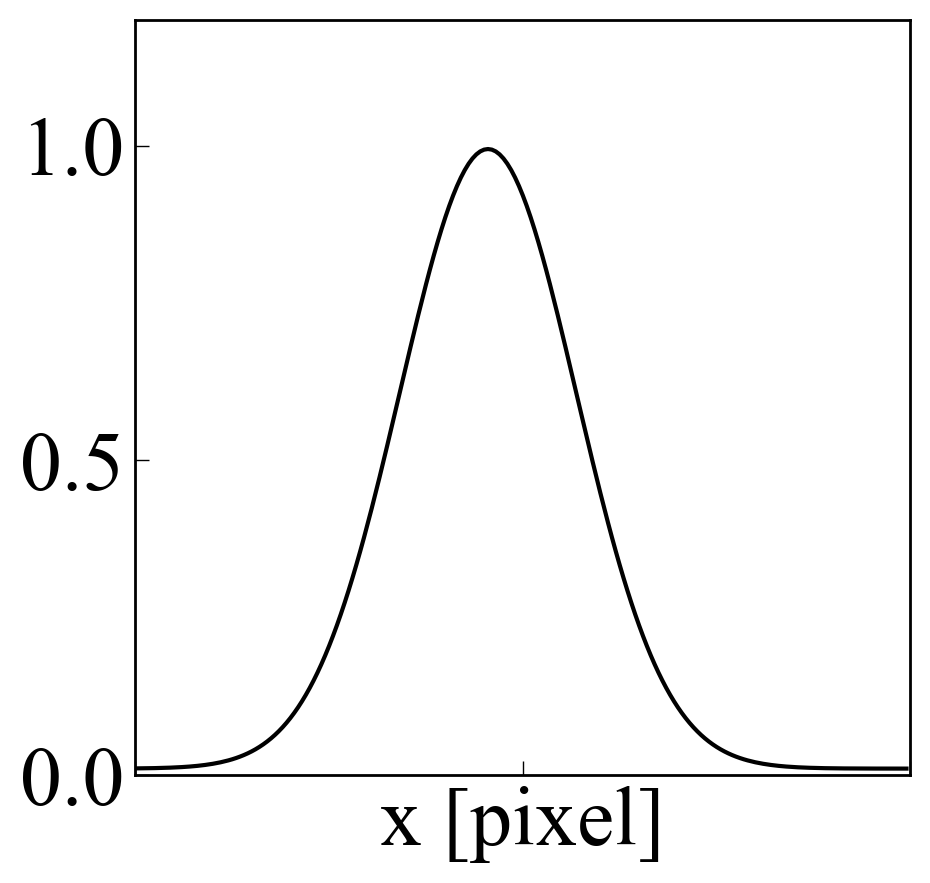

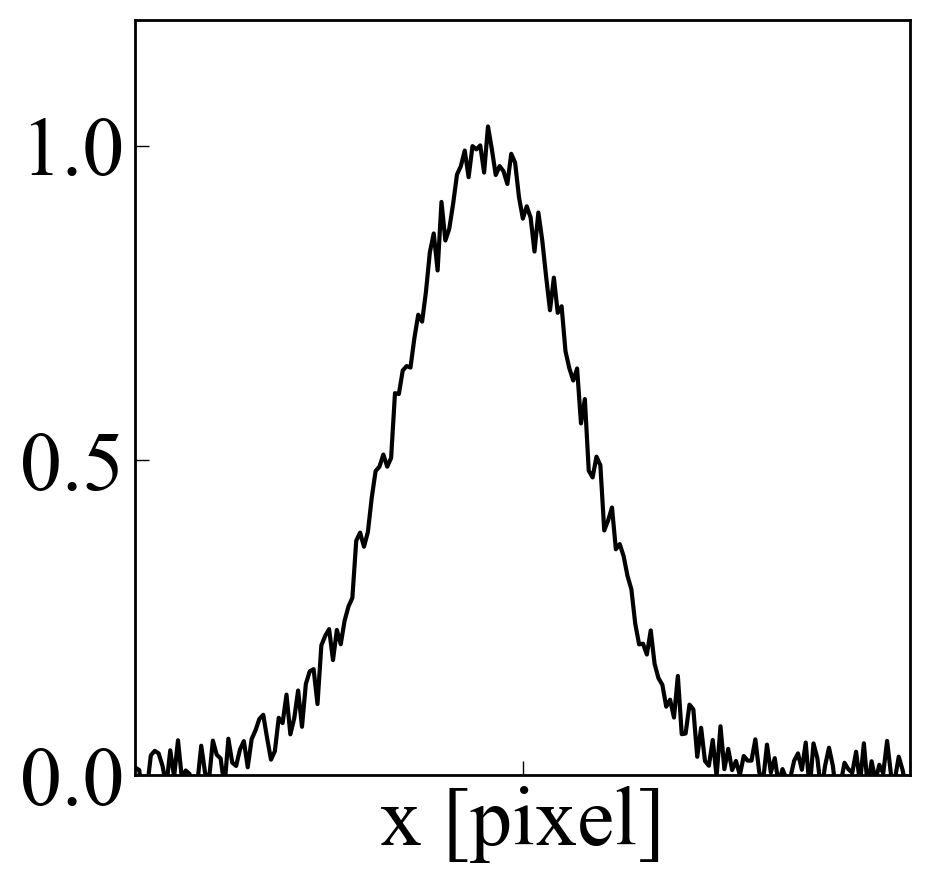

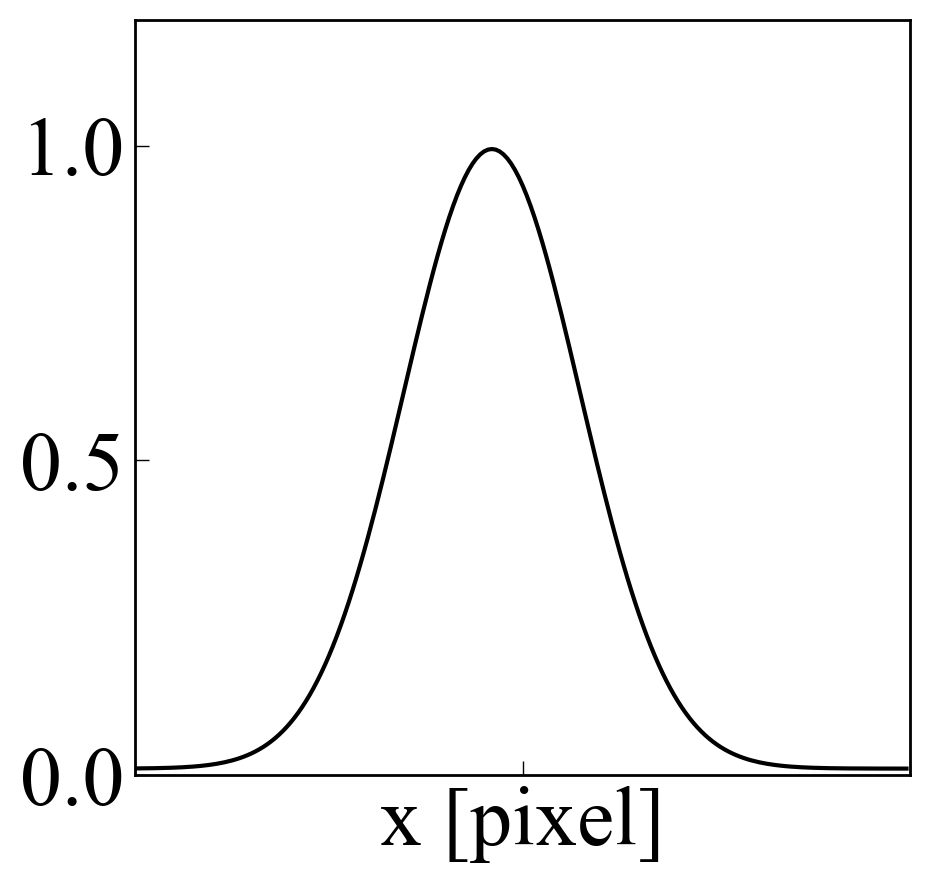

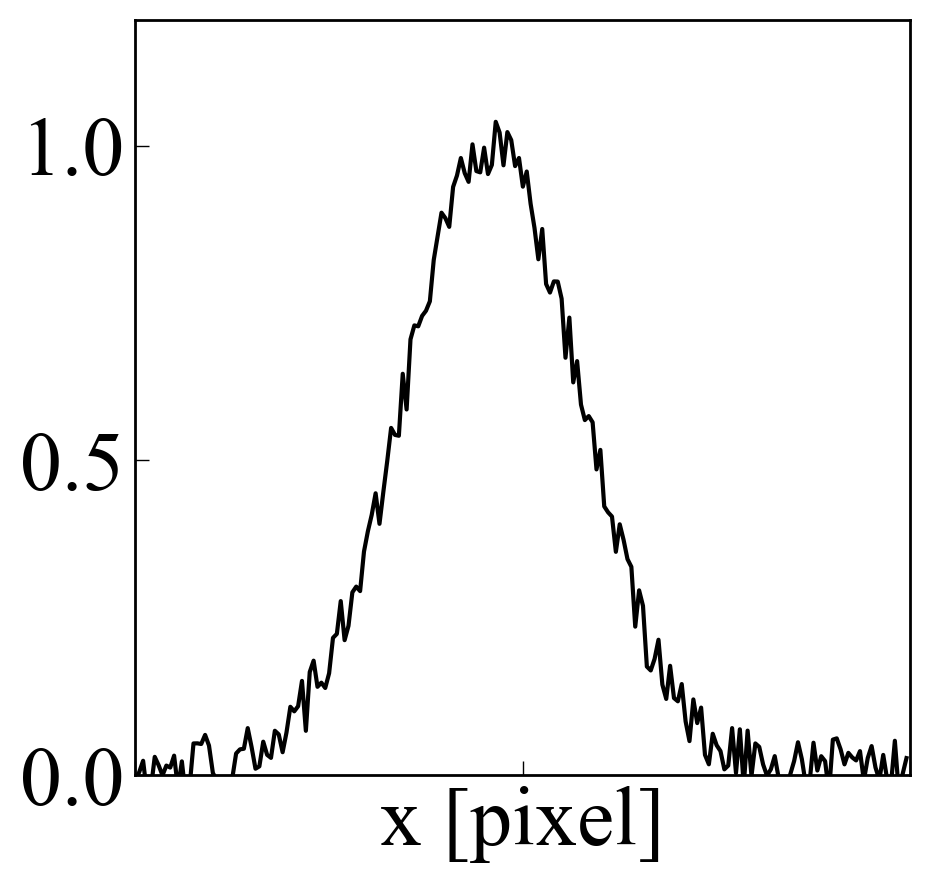

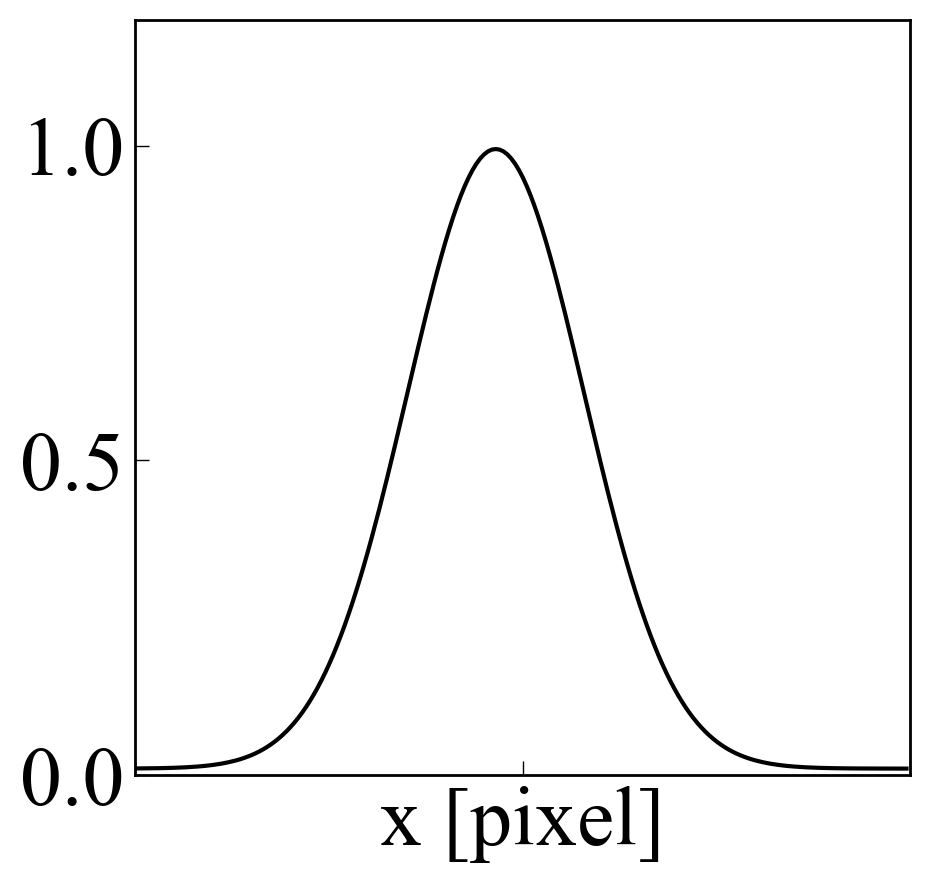

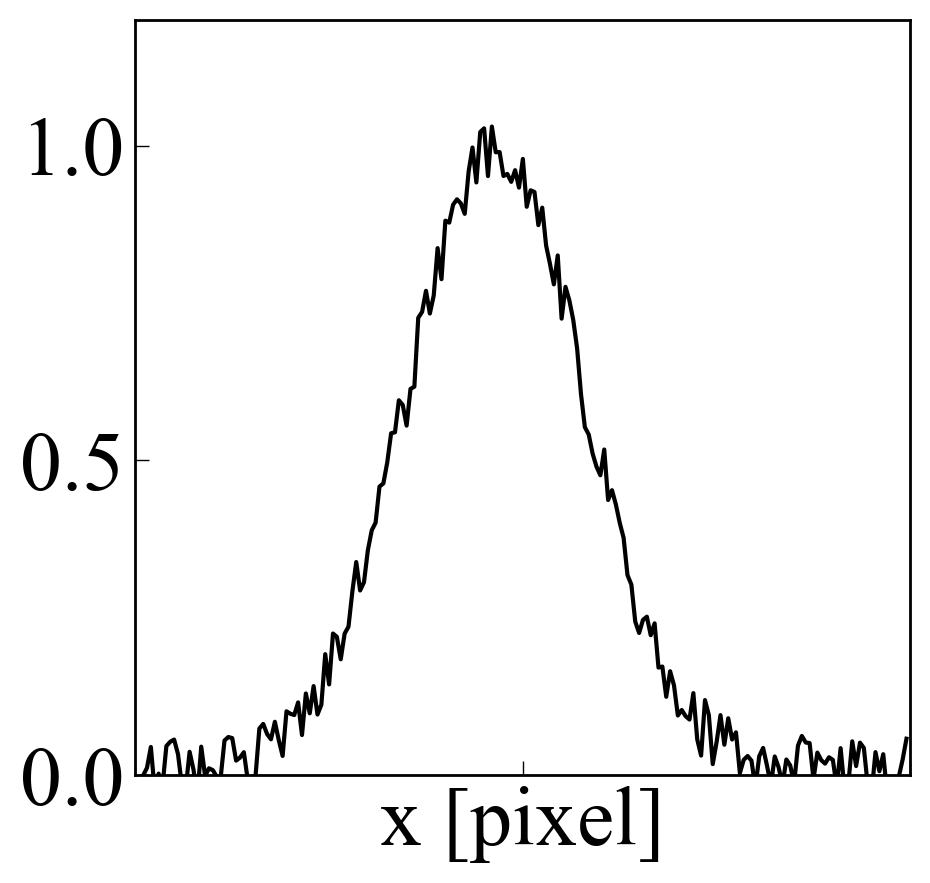

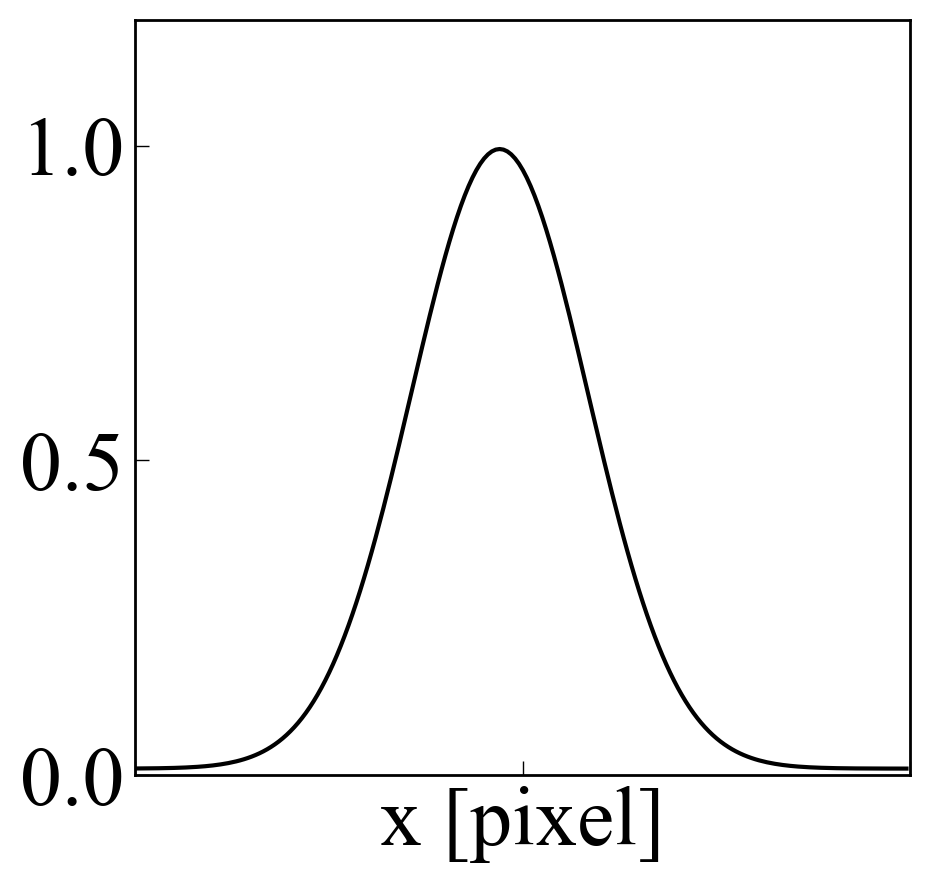

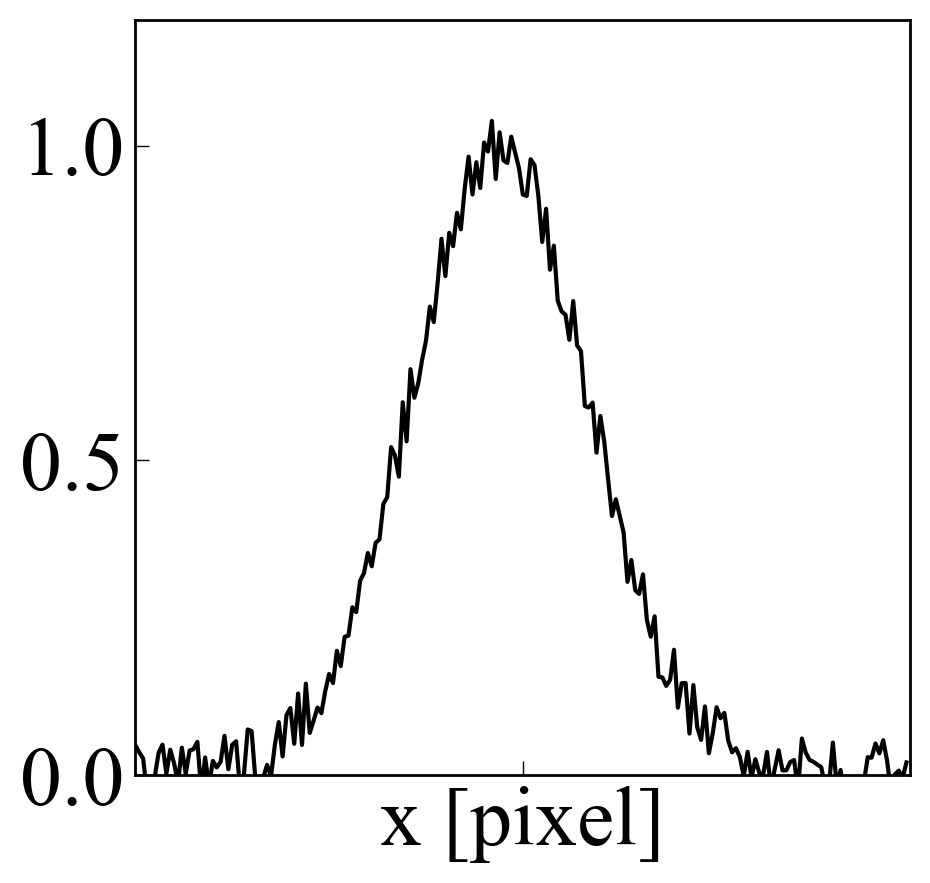

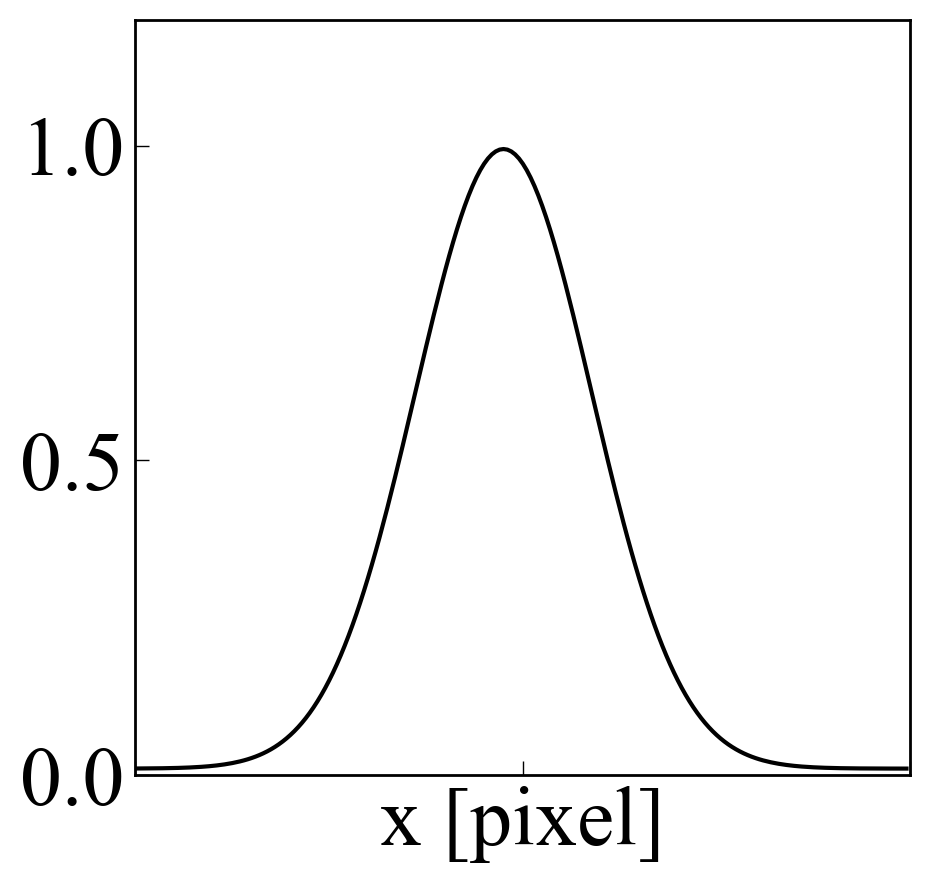

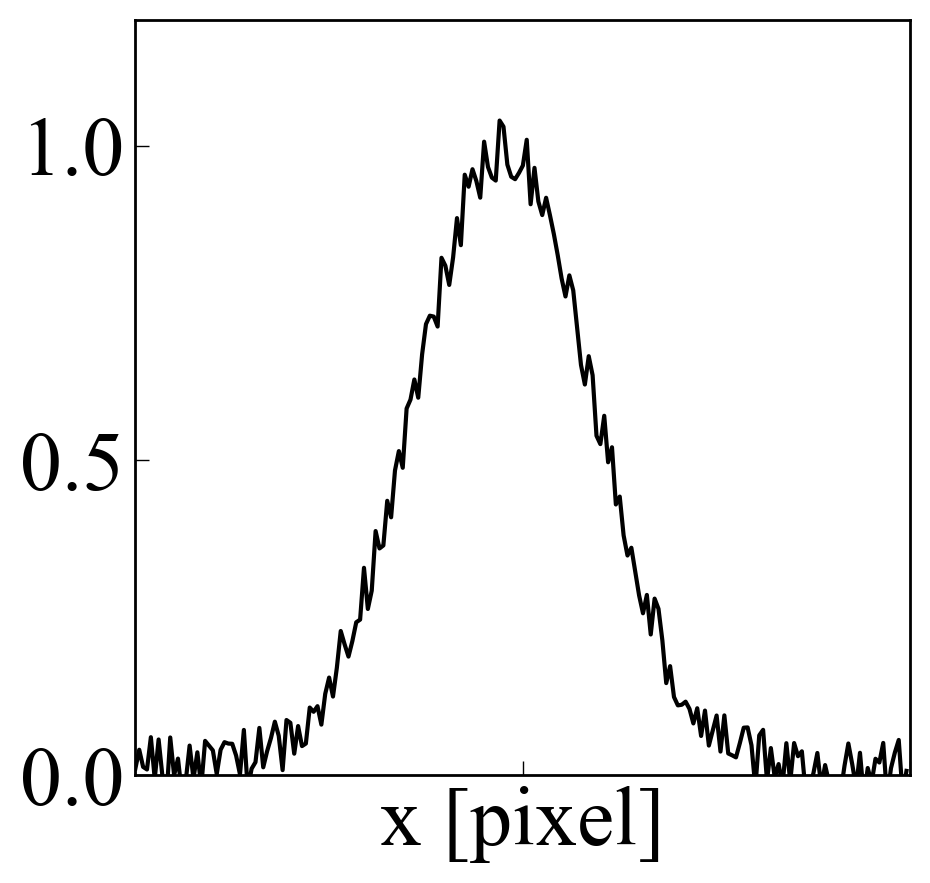

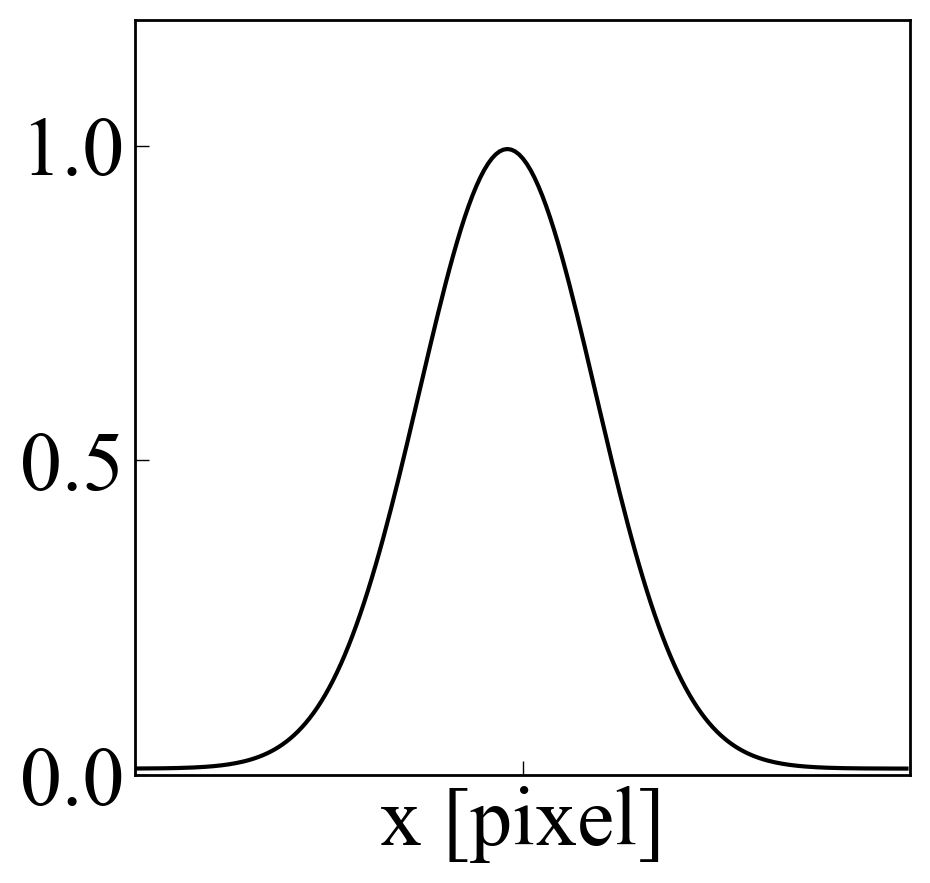

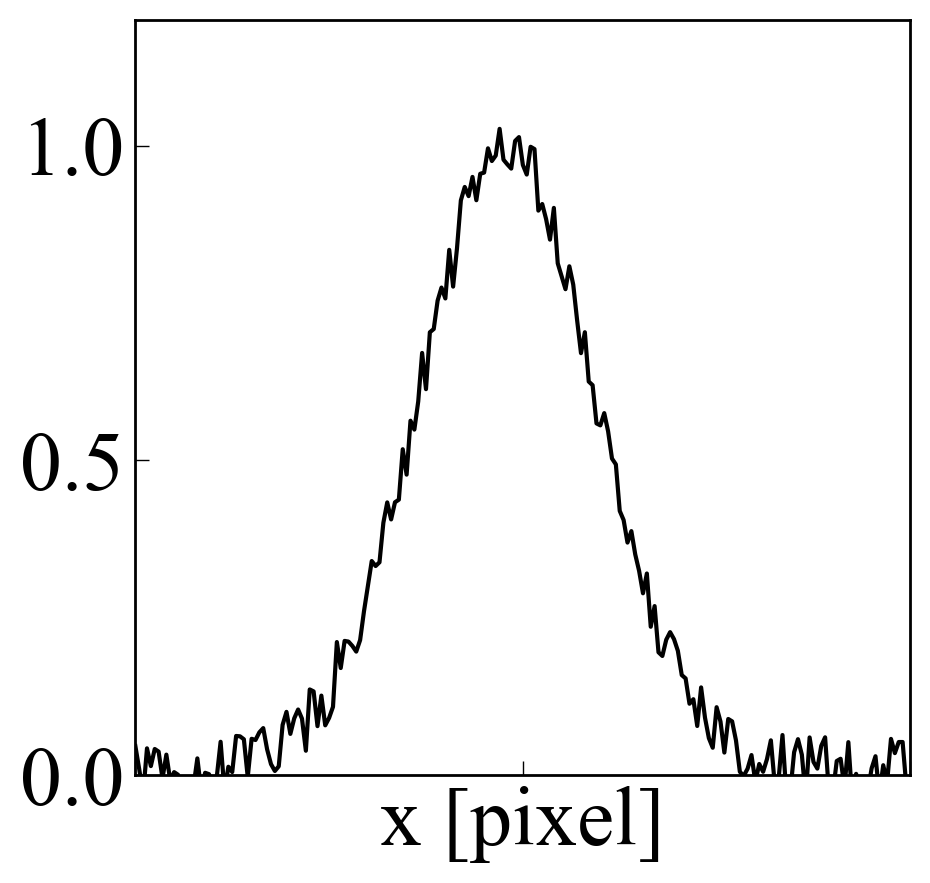

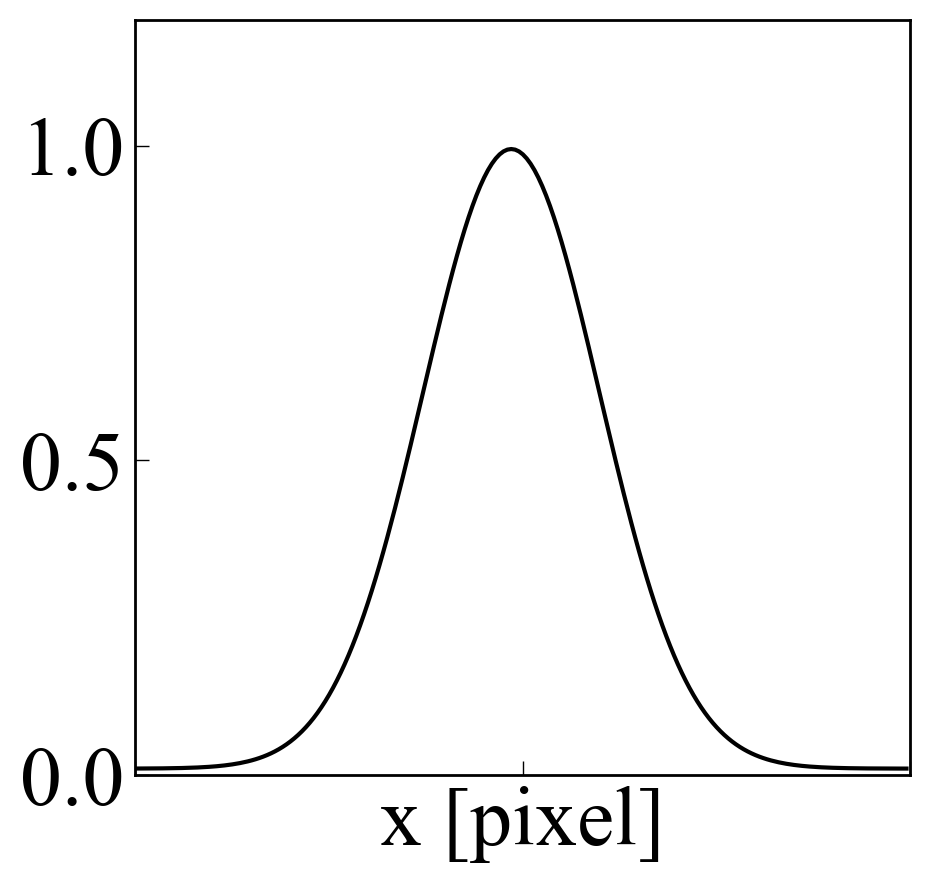

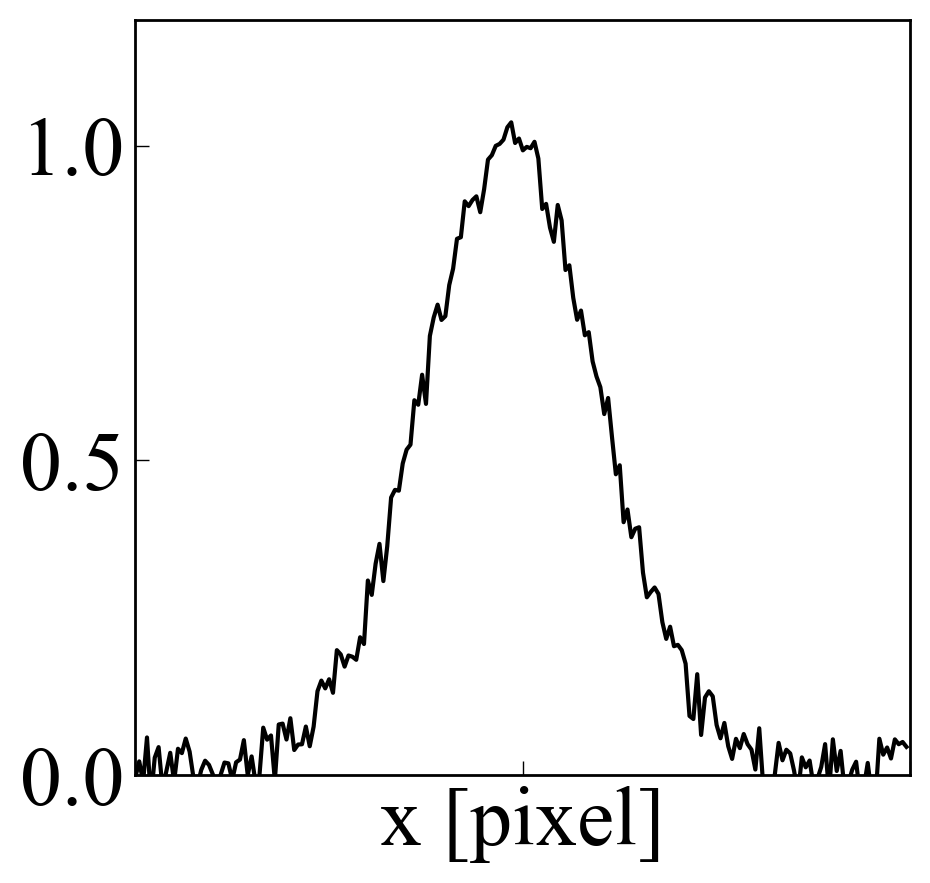

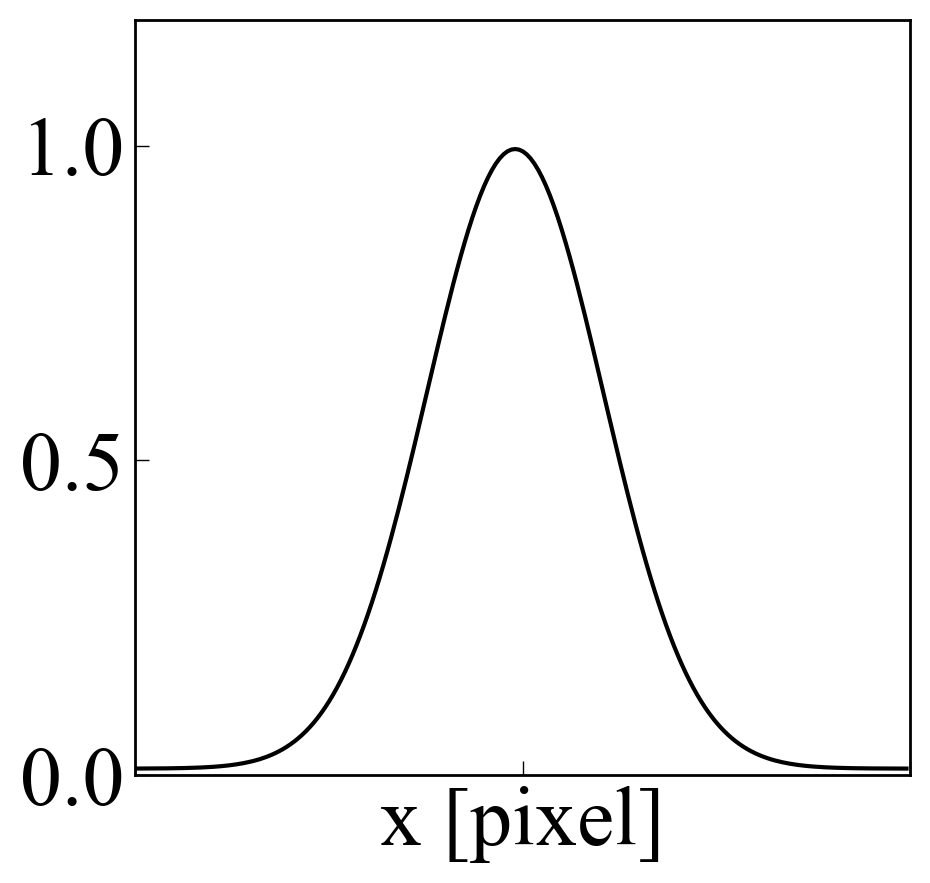

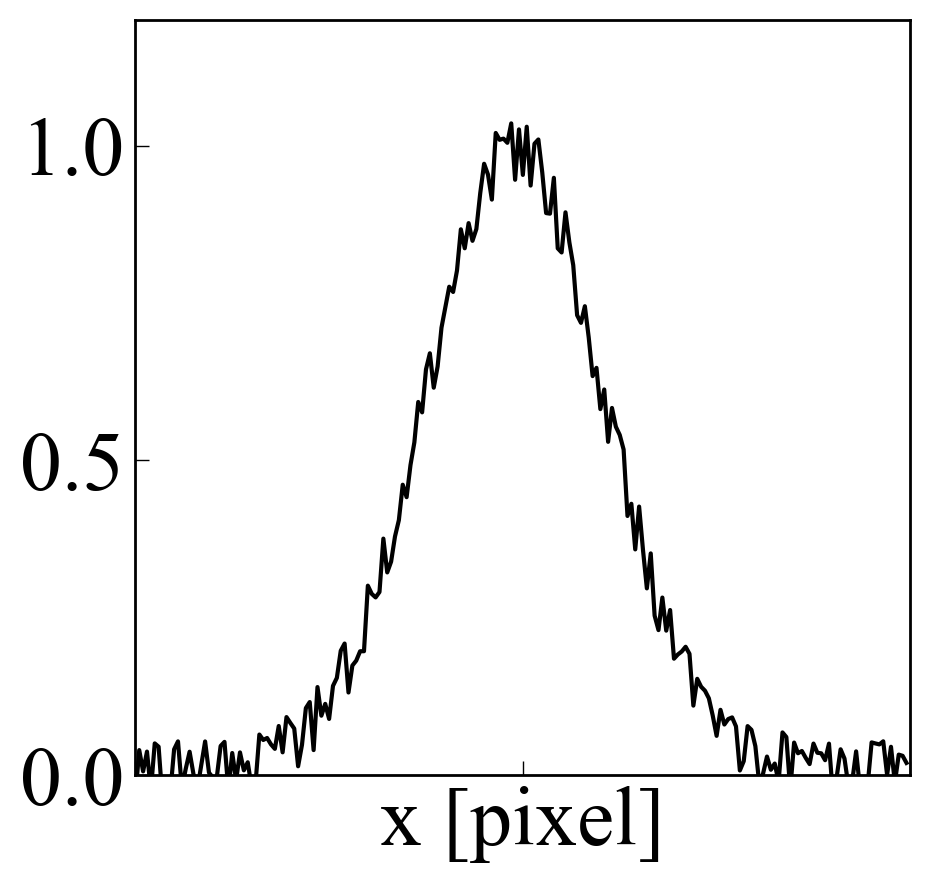

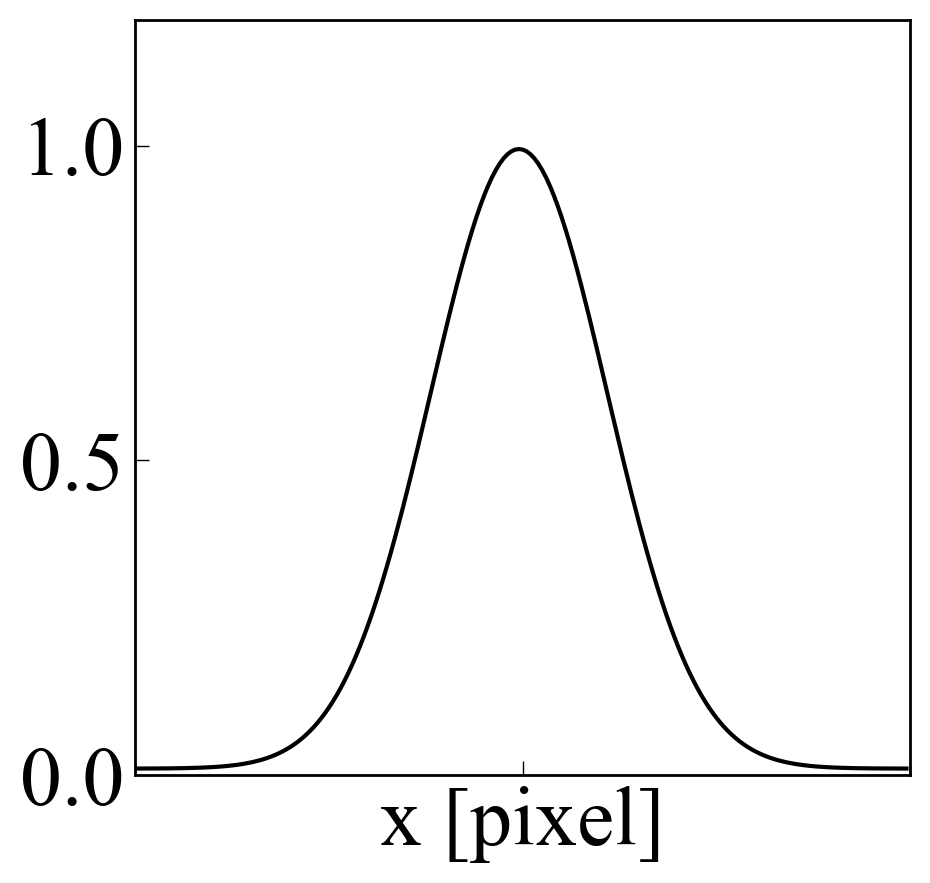

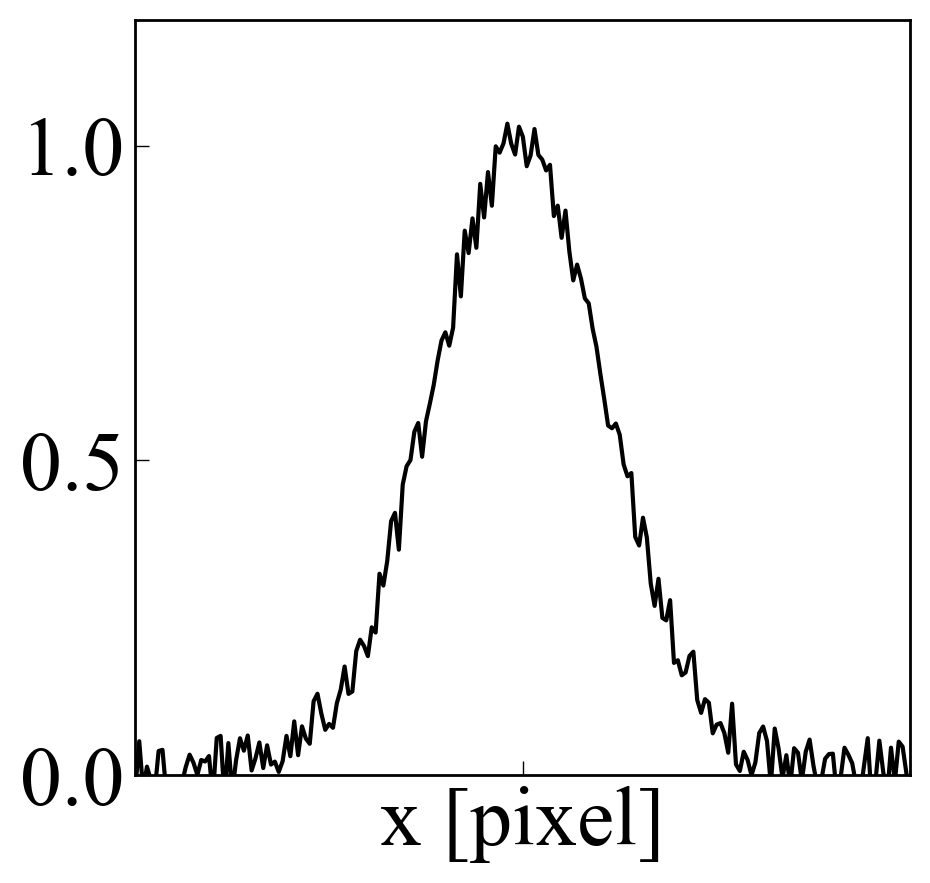

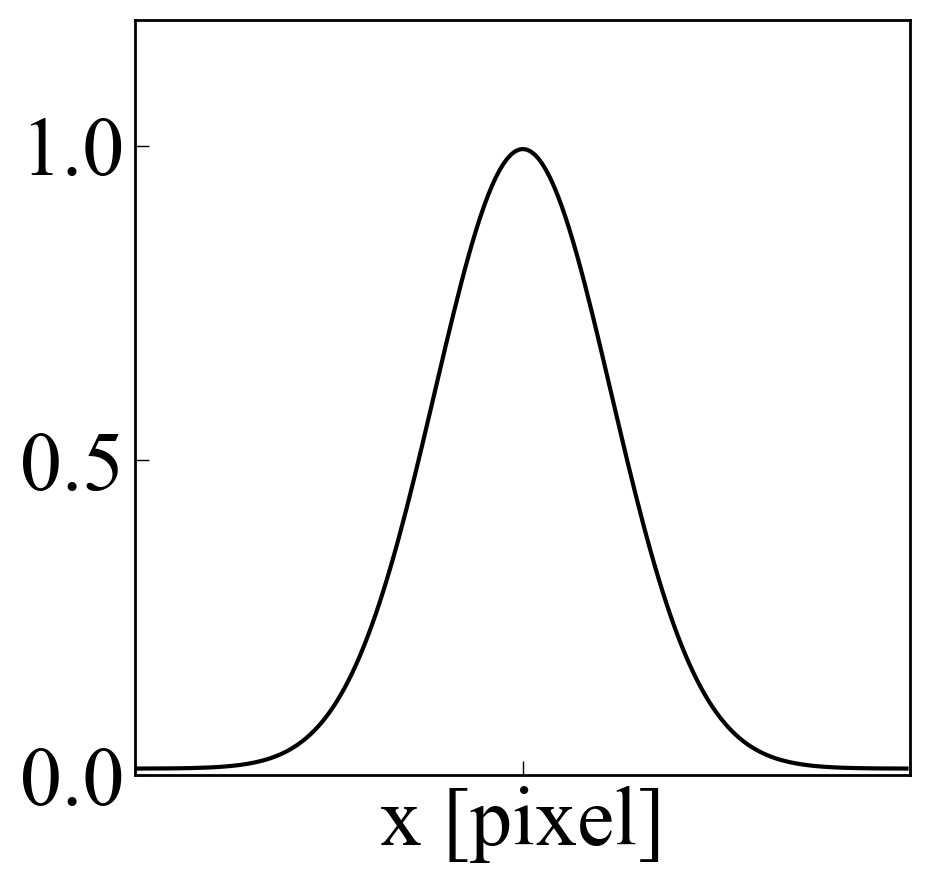

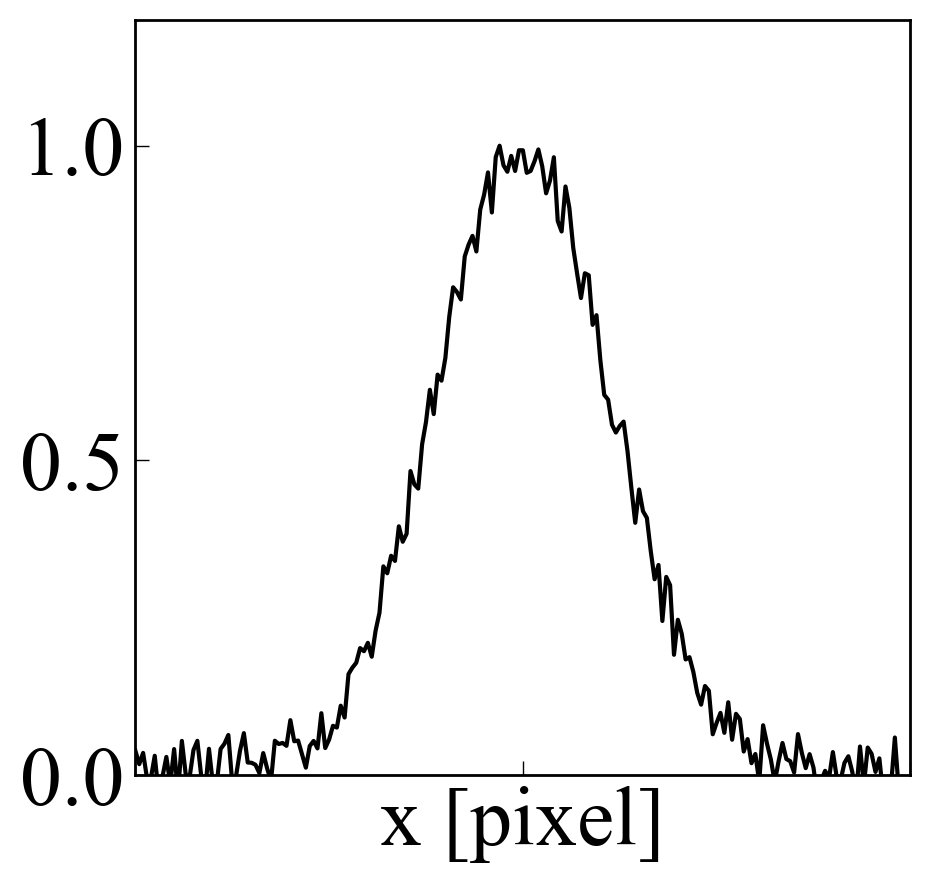

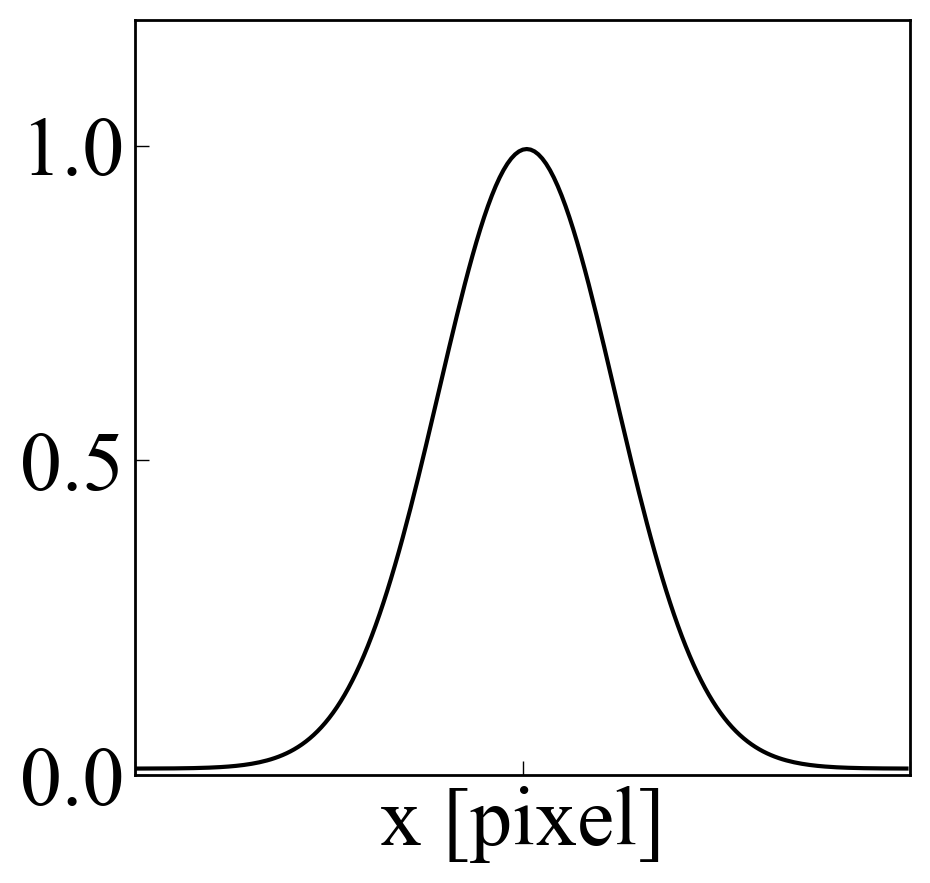

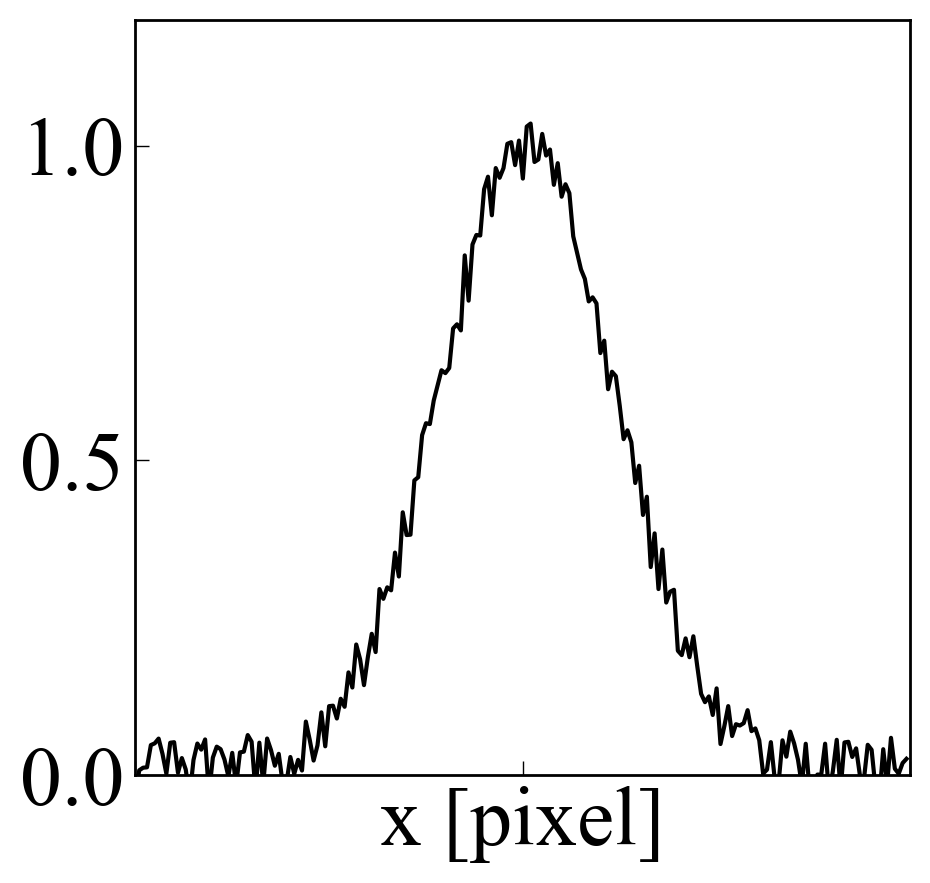

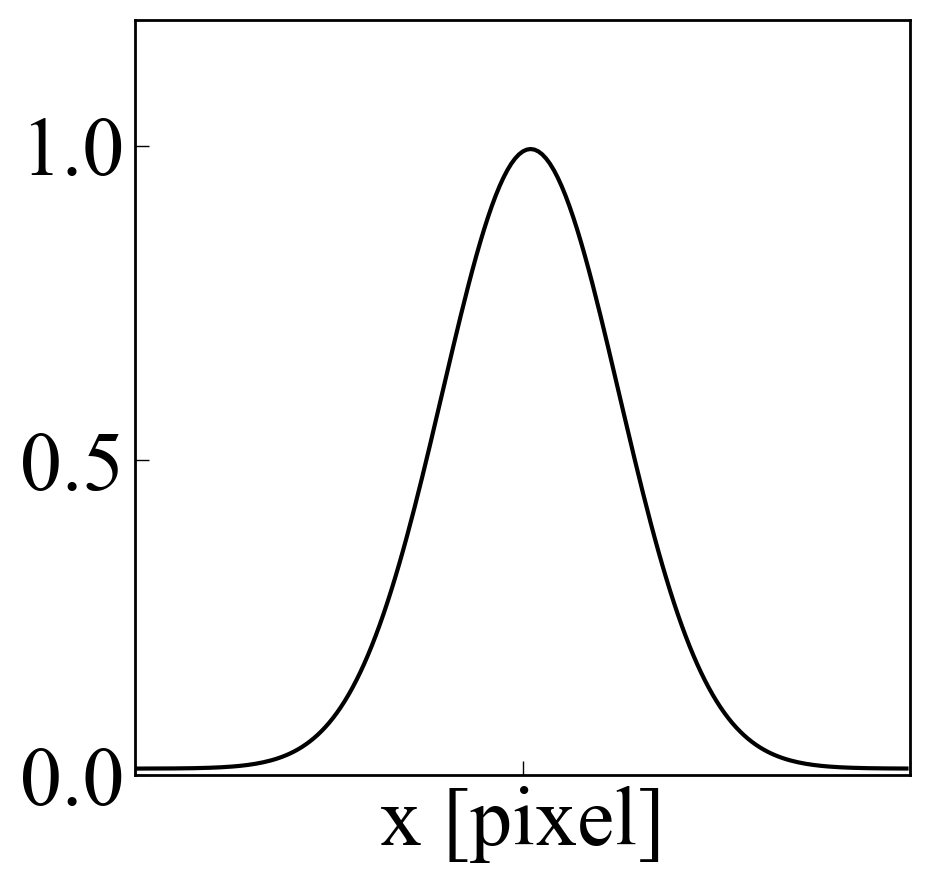

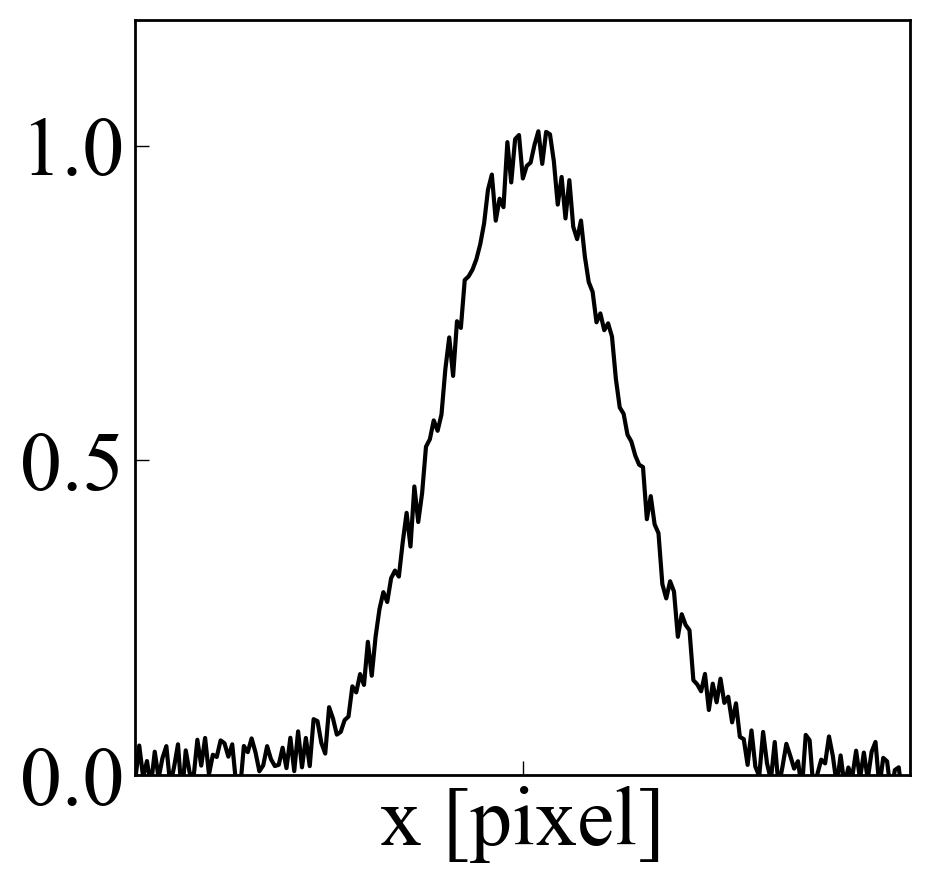

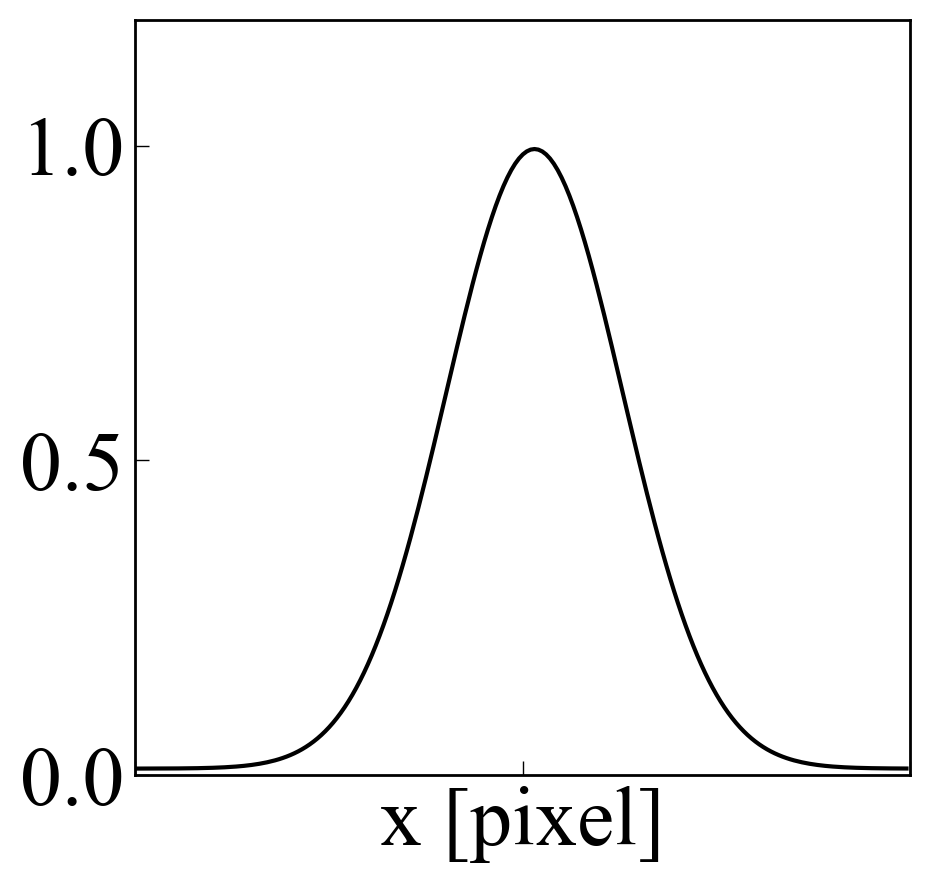

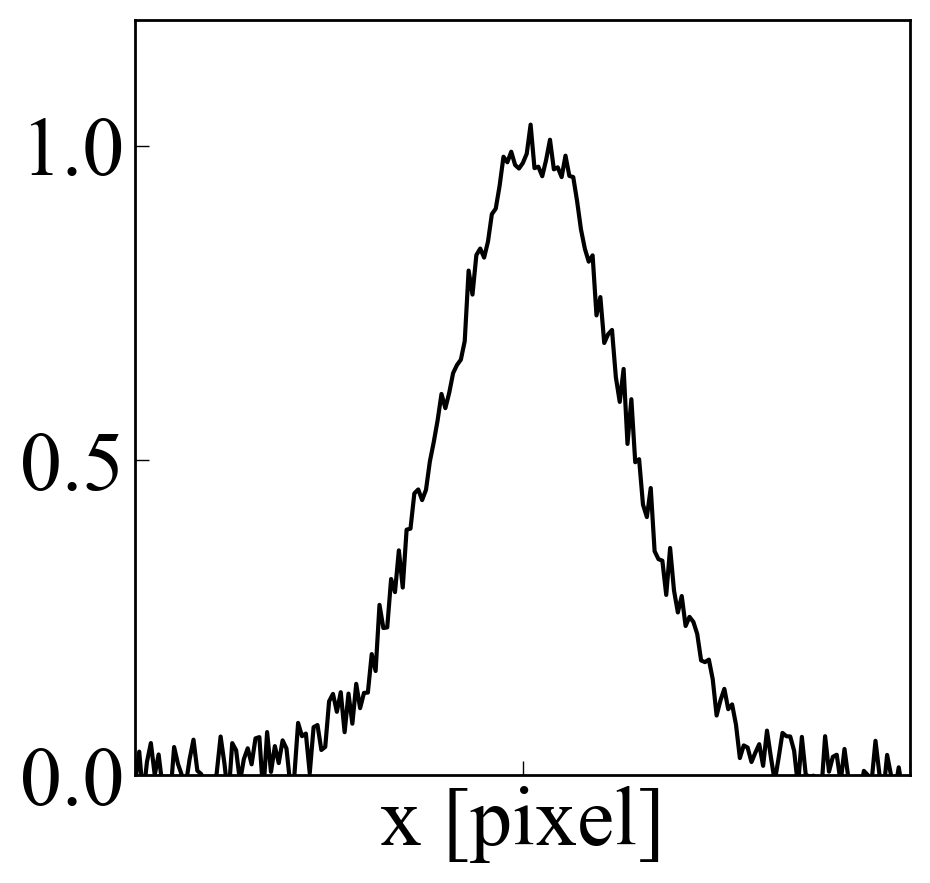

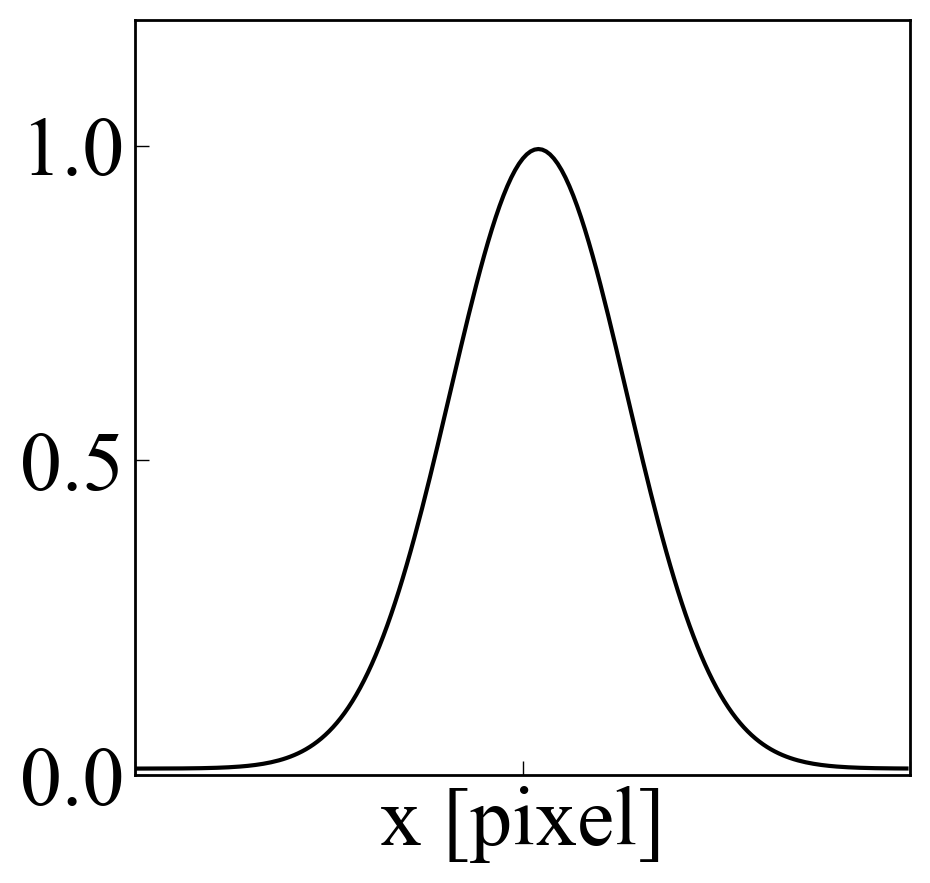

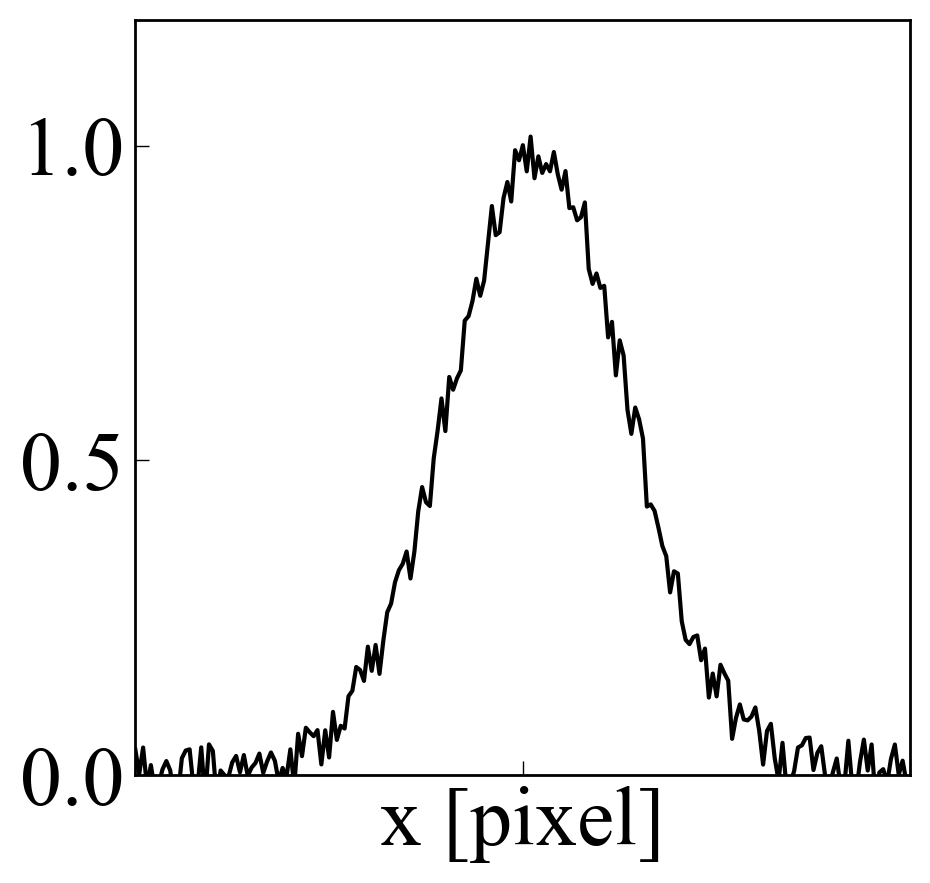

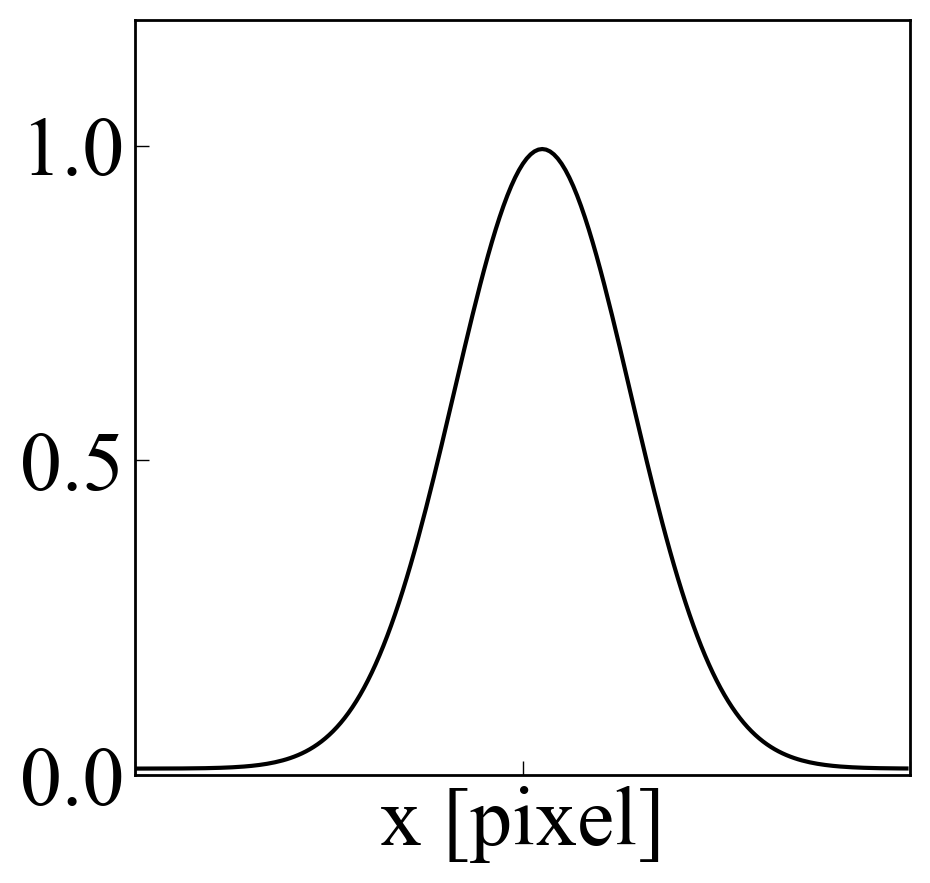

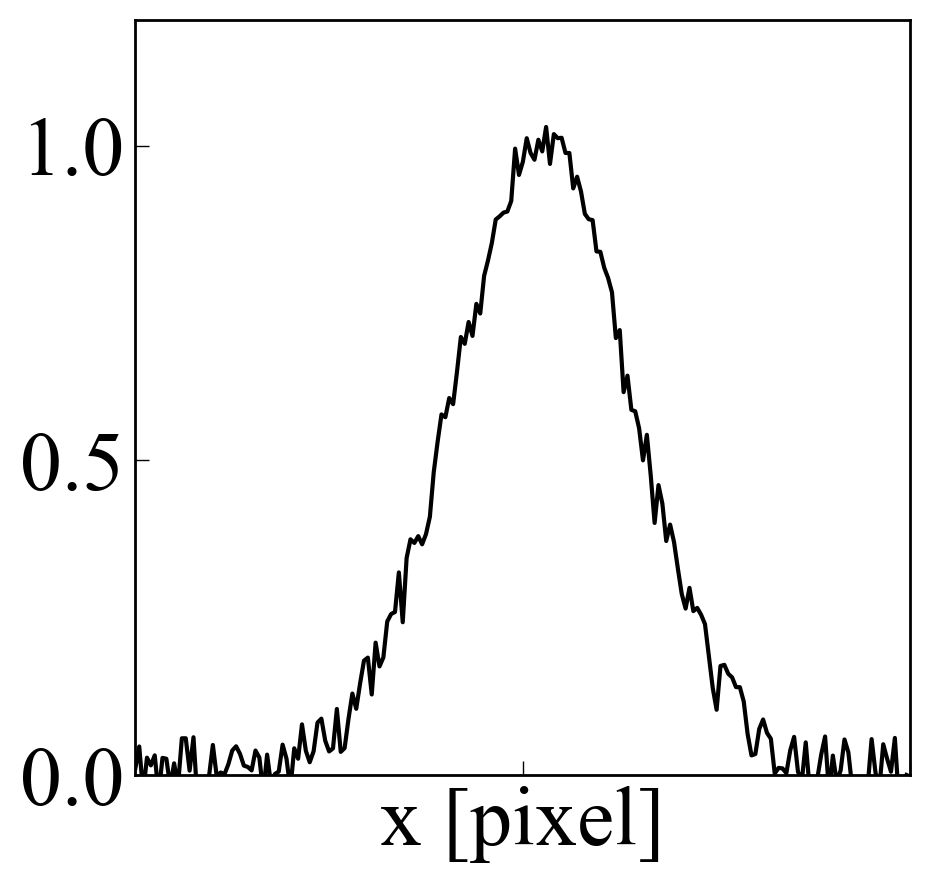

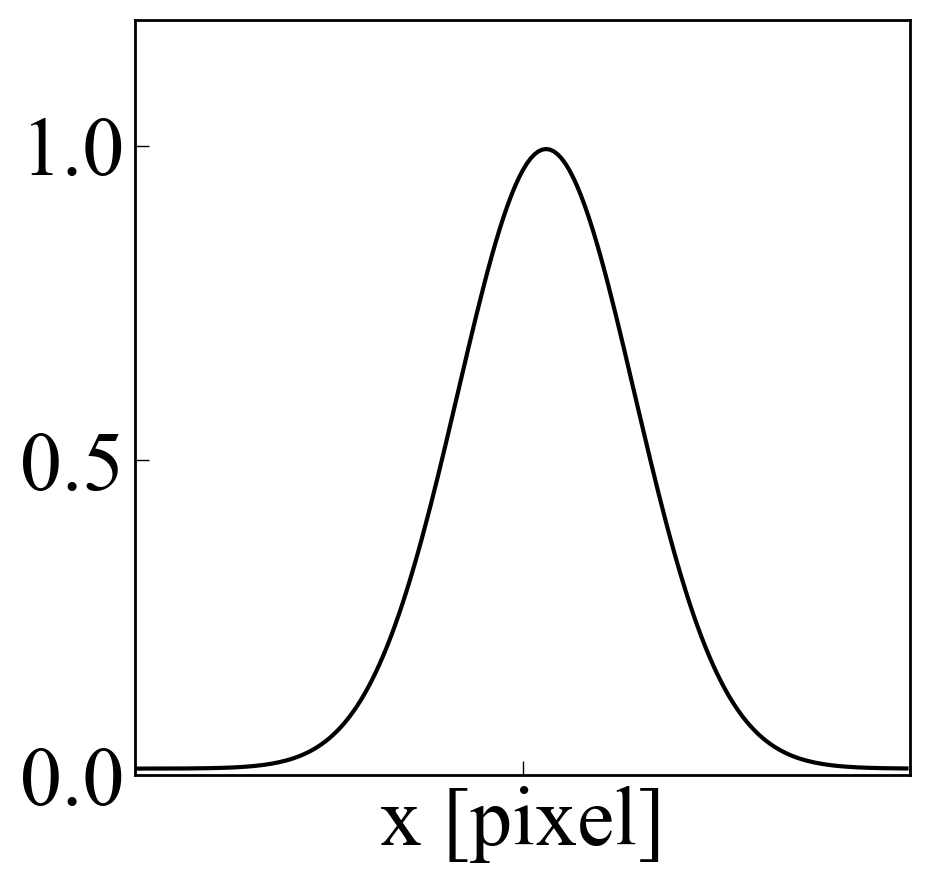

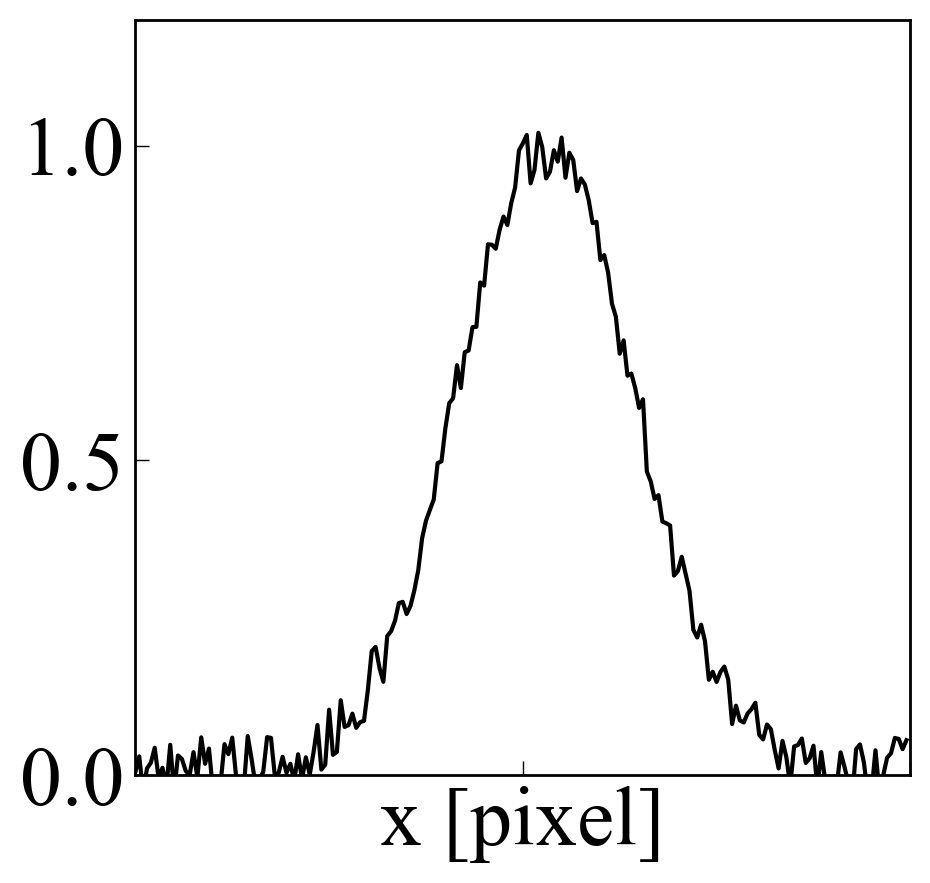

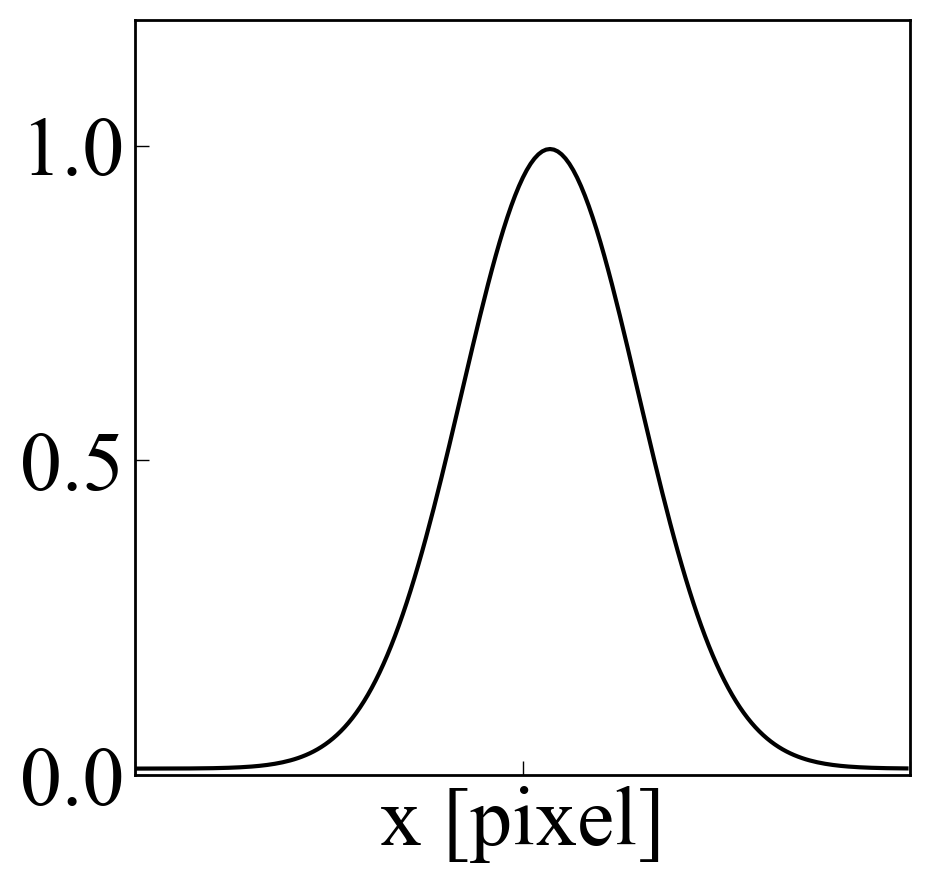

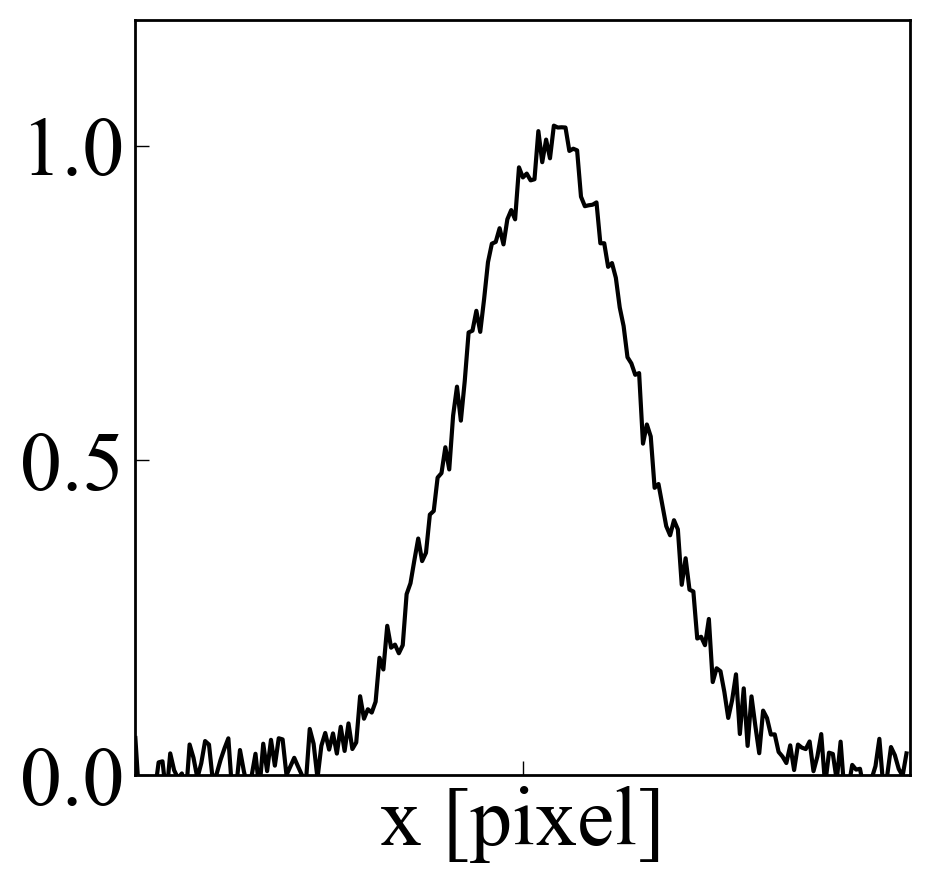

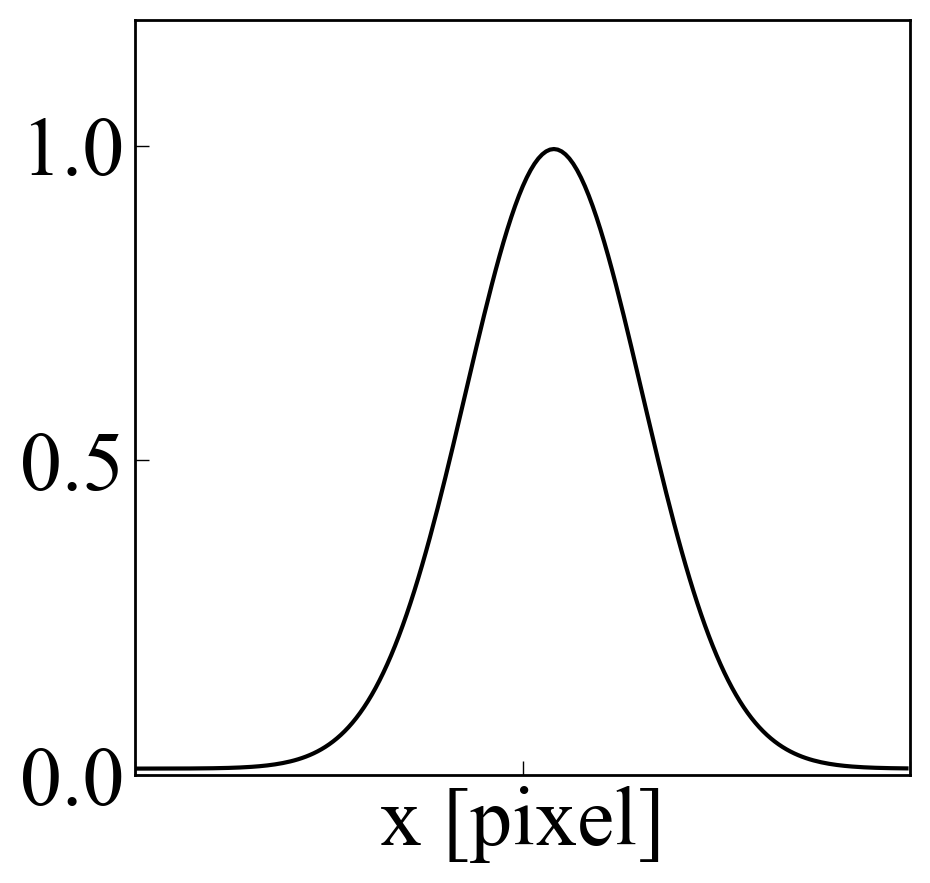

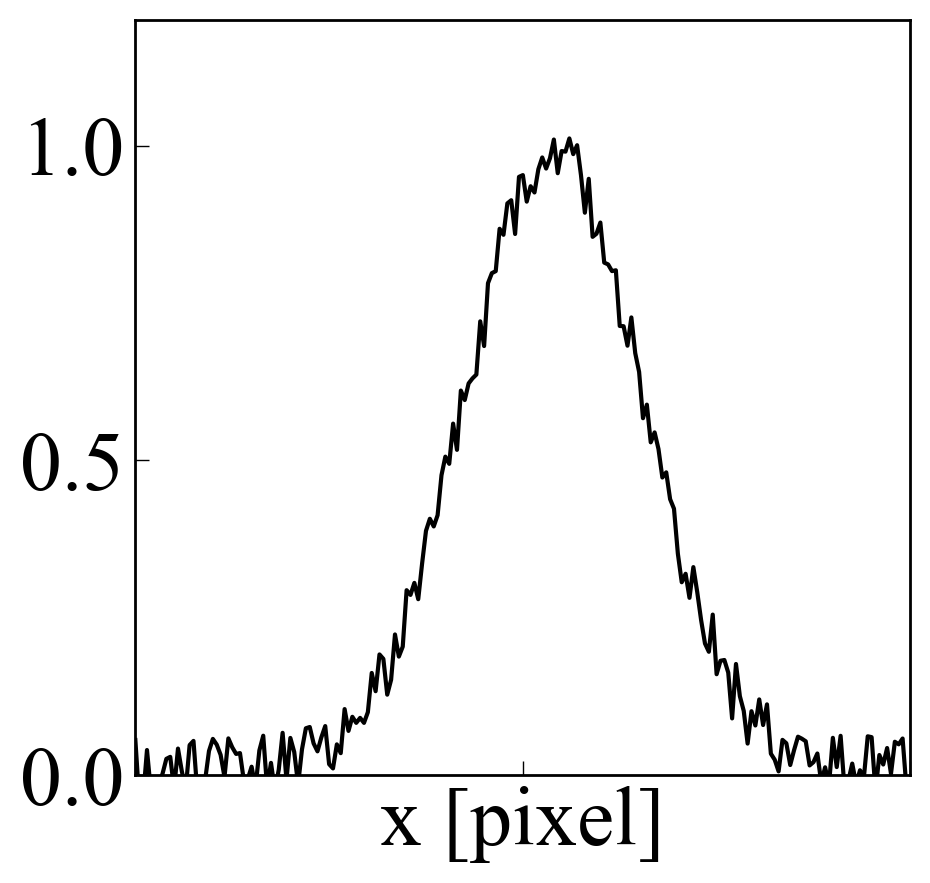

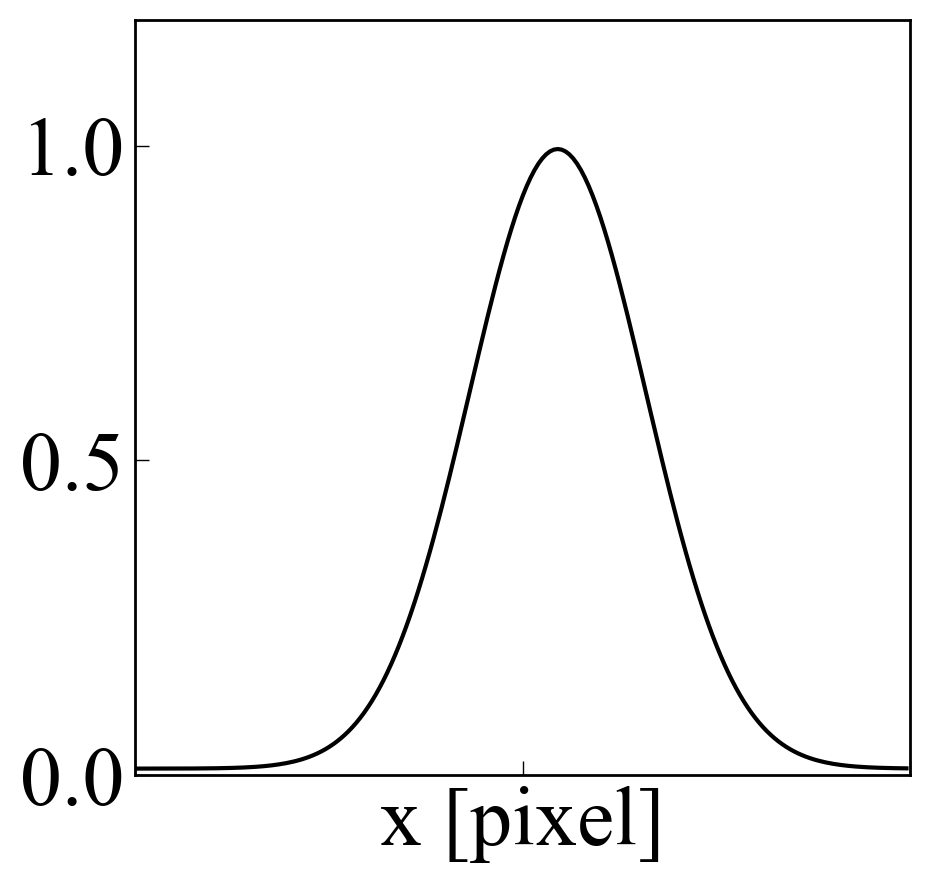

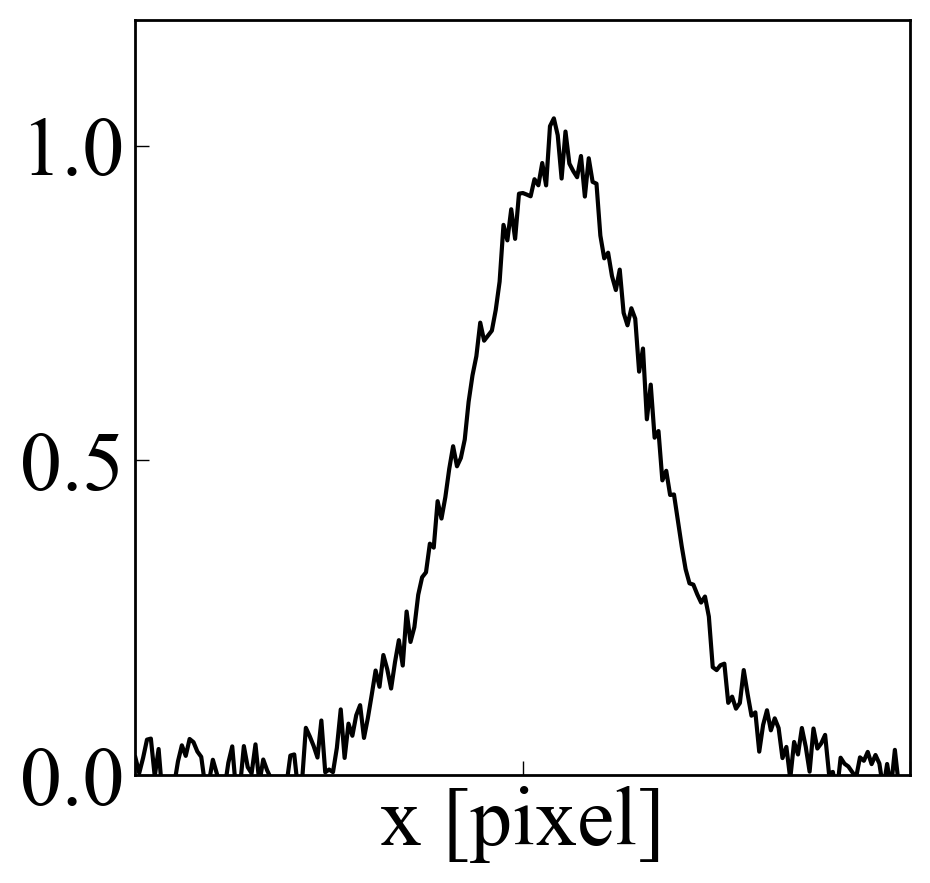

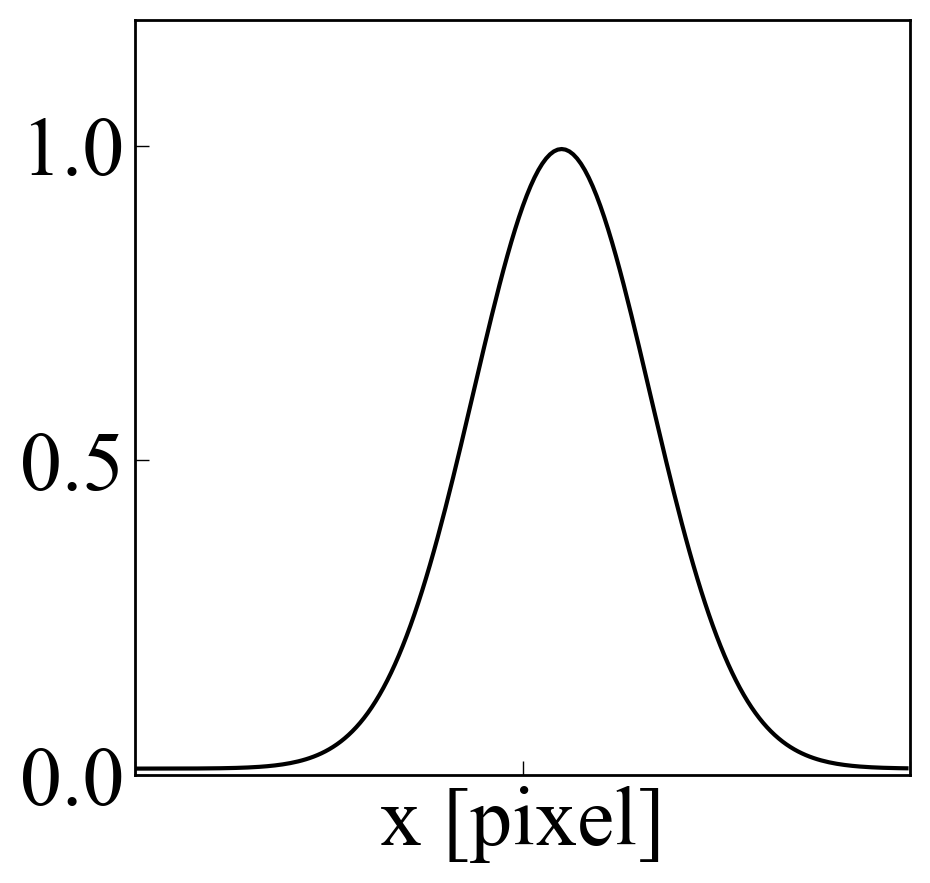

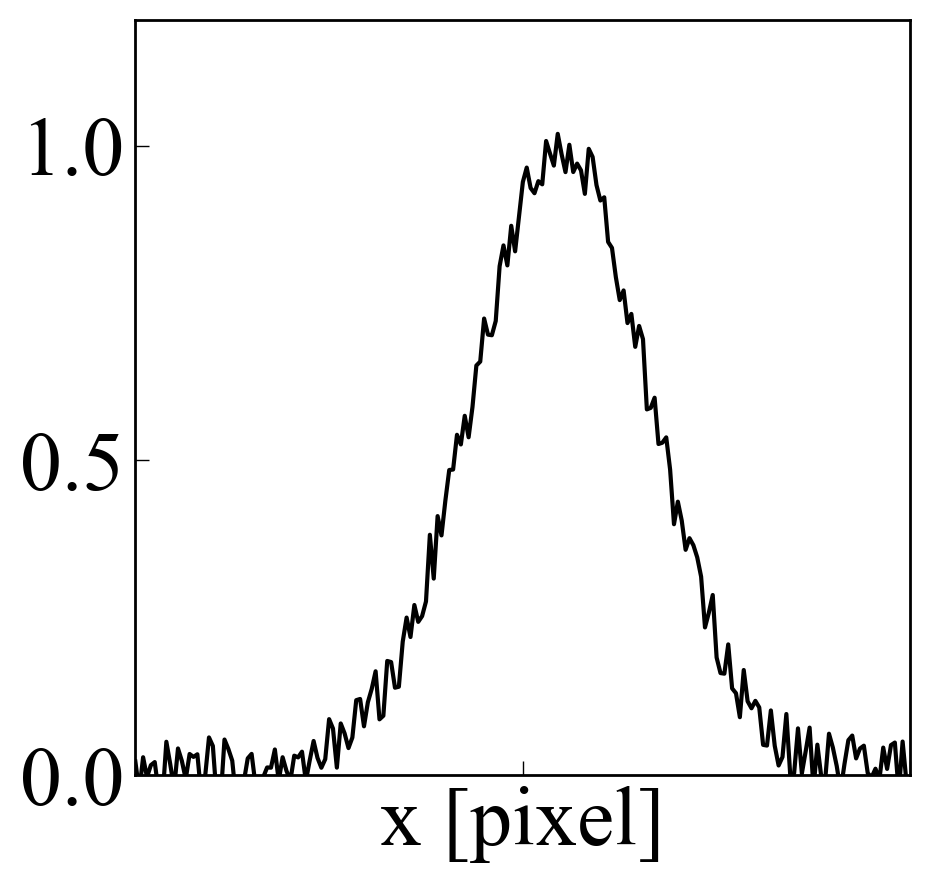

In [15]:
start = time.time()

intensity_noise = np.zeros((N,nx))
for n in range(N):
    #初期パラメータ
    i0 = param[0]
    x0 = idx[n]
    w0 = param[2]
    h0 = param[3]
    param = np.array([i0,x0,w0,h0])  #初期値
    #強度の計算
    intensity[n] = gaussian_beam(x_array, *param)
    noise = (np.random.rand(nx)-0.5)*10*0.01
    intensity_noise[n] = intensity[n] + noise
    save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_gauss{x0}.pdf'
    save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.set_xlabel("x [pixel]", fontsize=30)
    #ax.set_ylabel("y[pixel]", fontsize=16)
    ax.set_xlim(0.0,200.0)
    ax.set_ylim(0.0,1.2)
    plt.tick_params(labelsize=30)
    ax.grid(False)
    ax.plot(x_array, intensity[n], color='black')
    ax.tick_params(labelbottom=False,
               labelright=False,
               labeltop=False)
    fig.savefig(save_file, format="pdf", bbox_inches="tight")
    #plt.show()
    print(save_file)
    save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_gauss+noise{x0}.pdf'
    save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.set_xlabel("x [pixel]", fontsize=30)
    #ax.set_ylabel("y[pixel]", fontsize=16)
    ax.set_xlim(0.0,200.0)
    ax.set_ylim(0.0,1.2)
    plt.tick_params(labelsize=30)
    ax.tick_params(labelbottom=False,
               labelright=False,
               labeltop=False)
    ax.grid(False)
    ax.plot(x_array, intensity_noise[n], color='black')
    fig.savefig(save_file, format="pdf", bbox_inches="tight")
    #plt.show()
    print(save_file)